In [ ]:
import pandas as pd
df=pd.read_csv('/content/all_stocks_5yr.csv')
df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

BASIC ANALYSIS

In [ ]:
df.describe()

open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08

In [ ]:
df.isnull().sum()


date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [ ]:
for column in df.select_dtypes(include=['number']).columns: # Iterate through numerical columns only
    df[column] = df[column].fillna(df[column].mean())

# Display the updated DataFrame
df.head()

date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
from scipy import stats
import matplotlib.dates as mdates
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

init_notebook_mode(connected=True)
%matplotlib inline
# matplotlib defaults
plt.style.use("fivethirtyeight")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install mplfinance



!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan==2.19.1.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 55.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)


In [ ]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 70.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [ ]:
import mplfinance as mpf
from prophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
df.head().style.set_properties(**{'background-color': 'black',
                                    'color': 'lawngreen',
                                    'border': '1.5px  white'})

In [ ]:
df['Name'].nunique()

505

In [ ]:
pd.to_datetime(df['date']).max() - pd.to_datetime(df['date']).min()

Timedelta('1825 days 00:00:00')

In [ ]:
df = df.rename(columns={'Name':'ticks'})
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.describe()

date           open           high  \
count                         619040  619040.000000  619040.000000   
mean   2015-08-18 00:48:23.494443264      83.023334      83.778311   
min              2013-02-08 00:00:00       1.620000       1.690000   
25%              2014-05-20 00:00:00      40.220000      40.620000   
50%              2015-08-21 00:00:00      62.590000      63.150000   
75%              2016-11-15 00:00:00      94.370000      95.180000   
max              2018-02-07 00:00:00    2044.000000    2067.990000   
std                              NaN      97.377904      98.206884   

                 low          close        volume  
count  619040.000000  619040.000000  6.190400e+05  
mean       82.256096      83.043763  4.321823e+06  
min         1.500000       1.590000  0.000000e+00  
25%        39.830000      40.245000  1.070320e+06  
50%        62.020000      62.620000  2.082094e+06  
75%        93.535375      94.410000  4.284509e+06  
max      2035.110000    2049.000000  6.182376e+08  
std        96.506797      97.389748  8.693610e+06

In [ ]:
df.head()

date   open   high    low  close    volume ticks
0 2013-02-08  15.07  15.12  14.63  14.75   8407500   AAL
1 2013-02-11  14.89  15.01  14.26  14.46   8882000   AAL
2 2013-02-12  14.45  14.51  14.10  14.27   8126000   AAL
3 2013-02-13  14.30  14.94  14.25  14.66  10259500   AAL
4 2013-02-14  14.94  14.96  13.16  13.99  31879900   AAL

<Axes: xlabel='Month', ylabel='close'>

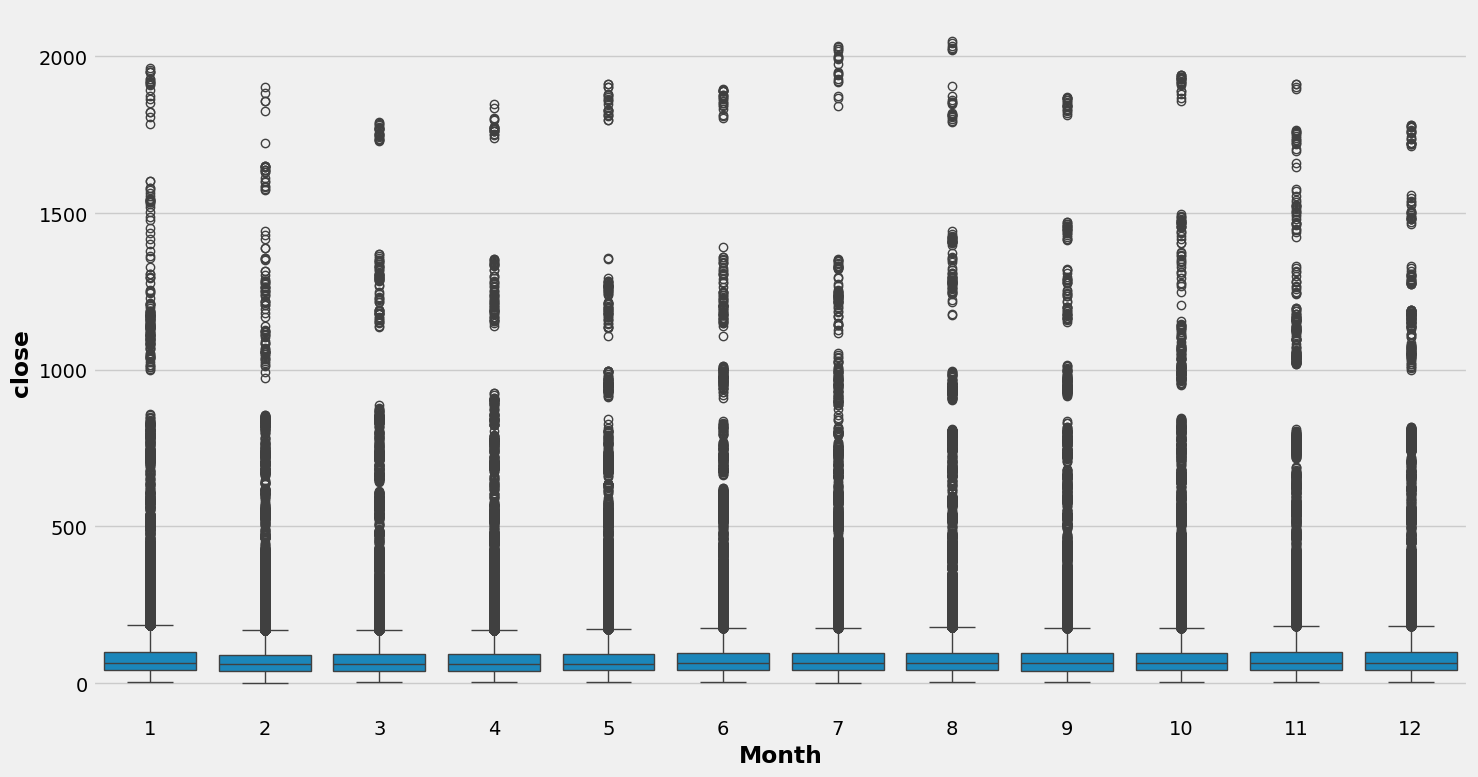

In [ ]:
plt.figure(figsize=(15, 8))
df['Month'] = df['date'].dt.month # Extract the month
sns.boxplot(x='Month', y='close', data=df)
#lots of outliers


<Axes: xlabel='close', ylabel='Count'>

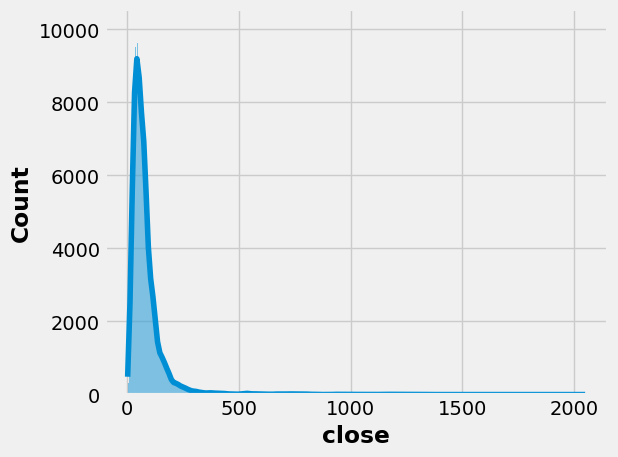

In [ ]:
sns.histplot(df['close'], kde=True) # Histogram with kernel density estimation

<Axes: xlabel='open', ylabel='Count'>

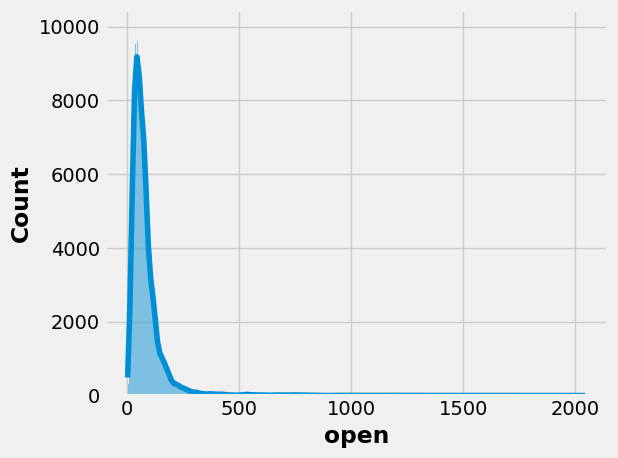

In [ ]:
sns.histplot(df['open'], kde=True) # Histogram with kernel density estimation

<Axes: xlabel='high', ylabel='Count'>

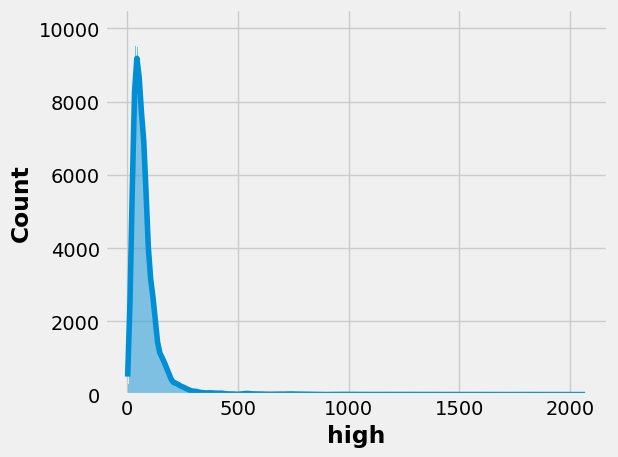

In [ ]:
sns.histplot(df['high'], kde=True) # Histogram with kernel density estimation

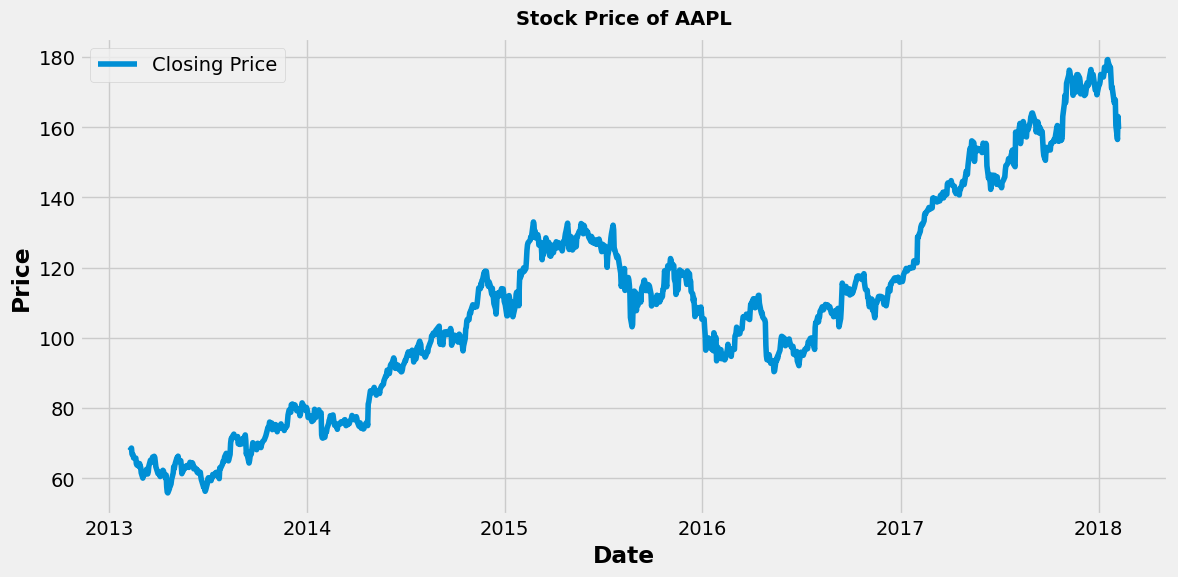

In [ ]:
stock_data = df[df['ticks'] == 'AAPL']

# Plot the closing price over time
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(stock_data['date'], stock_data['close'], label='Closing Price')

# Customize the chart
plt.title('Stock Price of AAPL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

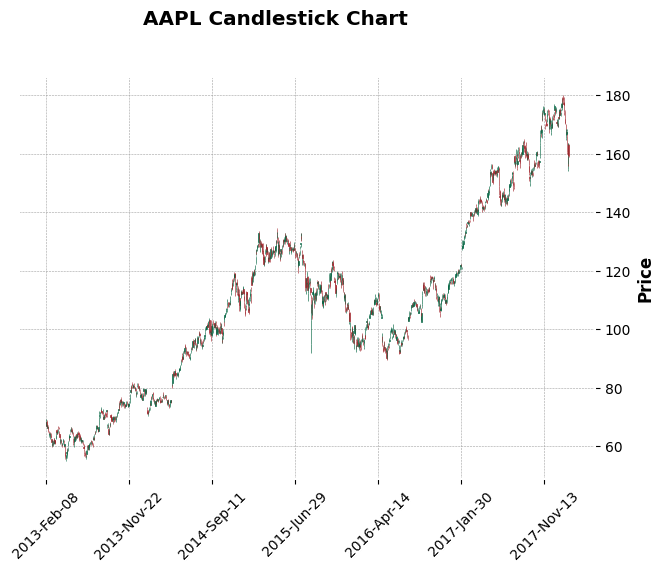

In [ ]:


# Filter data for AAPL
stock_data = df[df['ticks'] == 'AAPL']

# Convert 'date' column to datetime objects if not already


# Set 'date' as index
stock_data = stock_data.set_index('date')

# Select the columns needed for candlestick chart: 'open', 'high', 'low', 'close'
ohlc_data = stock_data[['open', 'high', 'low', 'close']]

# Create the candlestick chart
mpf.plot(ohlc_data, type='candle', title='AAPL Candlestick Chart', style='charles')

In [ ]:
#TOP TEN TICKERS BY AVERAGE TRADE VOLUME
mean_dict = {}

# find average of volume traded over a period of time using for loops
for key in df['ticks'].unique():
    value = df[df['ticks'] == key ]['volume'].mean()
    mean_dict[key]= value

print("Length of the mean of ticks dictionary:", len(mean_dict))

# convert dict to pandas dataframe
avaerage_s = pd.Series(mean_dict).transpose()
top10_s = avaerage_s.sort_values(ascending=False)[:10]

print("Top 10 company tickers with highest average traded stock volume:\n", top10_s.index)

Length of the mean of ticks dictionary: 505
Top 10 company tickers with highest average traded stock volume:
 Index(['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO'], dtype='object')


In [ ]:
# 10 COMPANIES DIFFERENT DATAFRAME THEN WILL WORK
def subdataframe(df, tick):

    # top 10 ticks
    ticks = list(top10_s.index)

    assert tick in ticks, """Stock tick does not belong to top 10 stocks by trade volume, please try any of these:\n
    ['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']"""

    ndf = df[df['ticks'] == tick]
    return ndf

In [ ]:
company_dict = {'BAC':'Bank of America',
                'AAPL':'Apple',
                'GE':'General Electric',
                'F':'Ford Motor Company',
                'FB':'Facebook',
                'MSFT':'Microsoft',
                'AMD':'Adavanced Micro Devices',
                'MU':'Micron Technology',
                'INTC':'Intel Corp',
                'CSCO':'Cisco'
               }
bac_df = subdataframe(df, 'BAC')
aapl_df = subdataframe(df, 'AAPL')
ge_df = subdataframe(df, 'GE')
f_df = subdataframe(df, 'F')
fb_df = subdataframe(df, 'FB')
msft_df = subdataframe(df, 'MSFT')
amd_df = subdataframe(df, 'AMD')
mu_df = subdataframe(df, 'MU')
intc_df = subdataframe(df, 'INTC')
csco_df = subdataframe(df, 'CSCO')


In [ ]:
def dailyfunc(df):
    df['daily return'] = ((df['close'] - df['open'])/df['open'])*100
    df.style.format('{:.2f}%', subset='daily return')
    df['daily_mean'] = (df['open'] + df['close'] + df['high'] + df['low'])/4
    df['co_name'] = company_dict[df['ticks'].unique()[0]]
    return df

bac_df = dailyfunc(bac_df)
aapl_df = dailyfunc(aapl_df)
ge_df = dailyfunc(ge_df)
f_df = dailyfunc(f_df)
fb_df = dailyfunc(fb_df)
msft_df = dailyfunc(msft_df)
amd_df = dailyfunc(amd_df)
mu_df = dailyfunc(mu_df)
intc_df = dailyfunc(intc_df)
csco_df = dailyfunc(csco_df)
bac_df.head()

date   open   high    low   close     volume ticks  Month  \
72870 2013-02-08  11.86  11.90  11.72  11.760  145217221   BAC      2   
72871 2013-02-11  11.73  11.90  11.67  11.860  103499848   BAC      2   
72872 2013-02-12  11.87  12.34  11.78  12.245  231771561   BAC      2   
72873 2013-02-13  12.35  12.42  12.05  12.170  192478919   BAC      2   
72874 2013-02-14  12.09  12.27  12.07  12.130  143901737   BAC      2   

       daily return  daily_mean          co_name  
72870     -0.843170    11.81000  Bank of America  
72871      1.108269    11.79000  Bank of America  
72872      3.159225    12.05875  Bank of America  
72873     -1.457490    12.24750  Bank of America  
72874      0.330852    12.14000  Bank of America

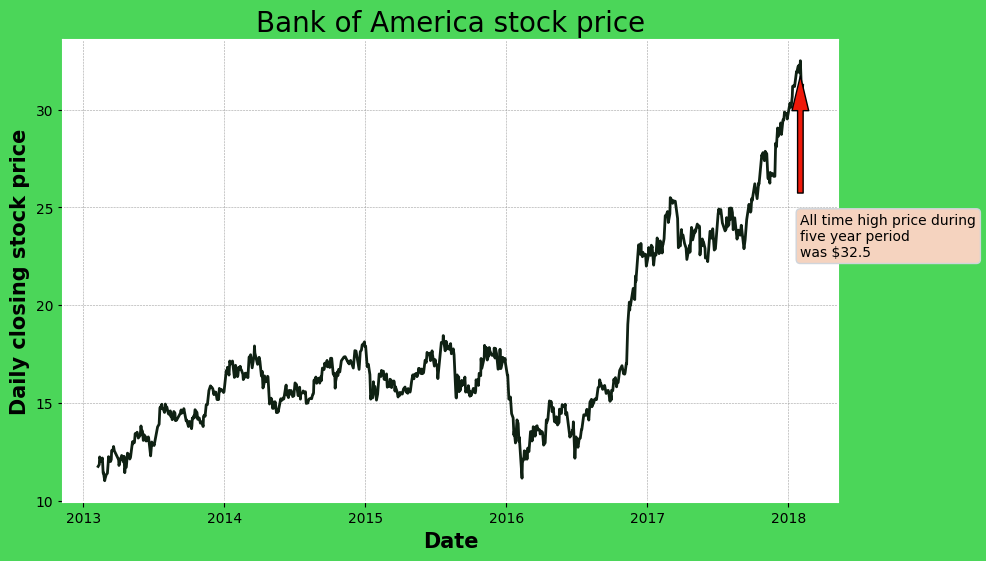

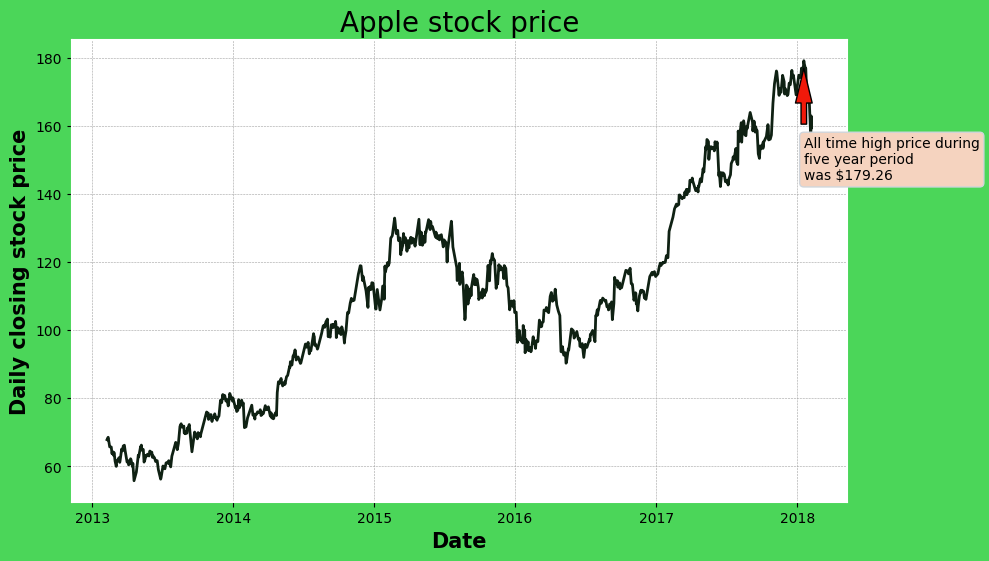

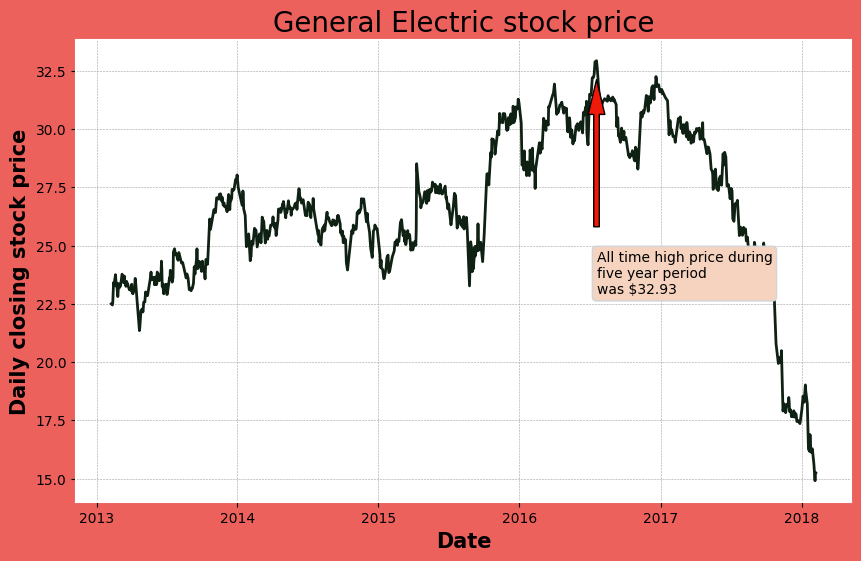

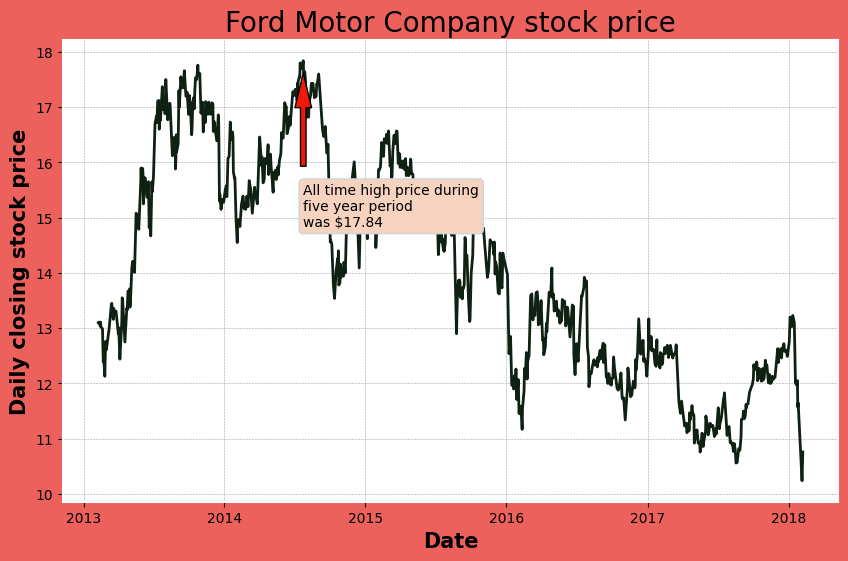

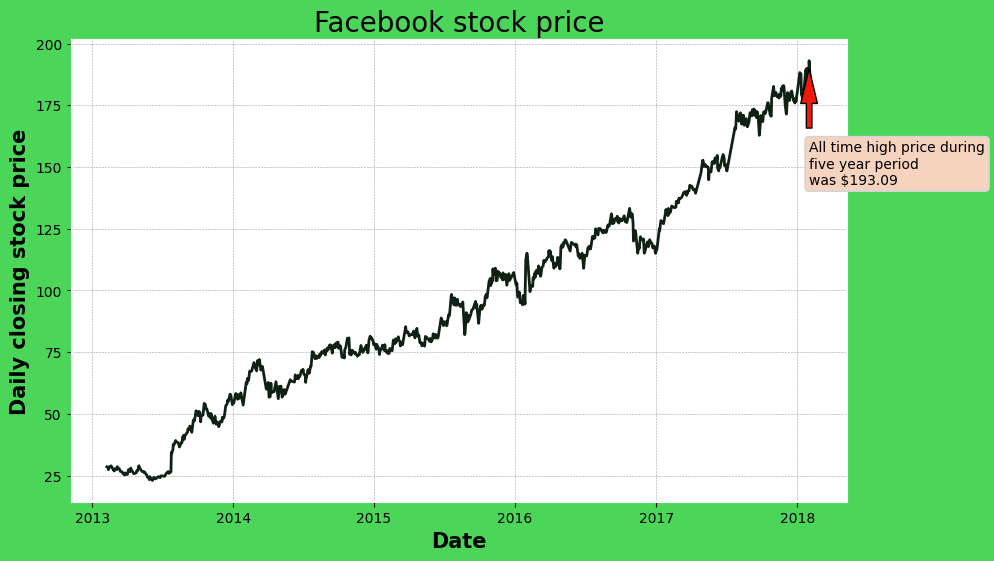

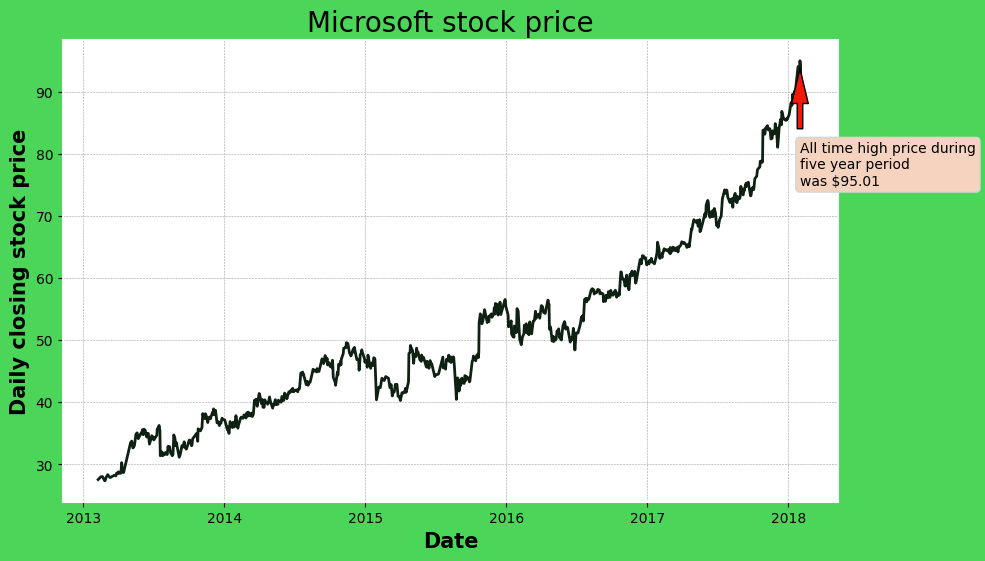

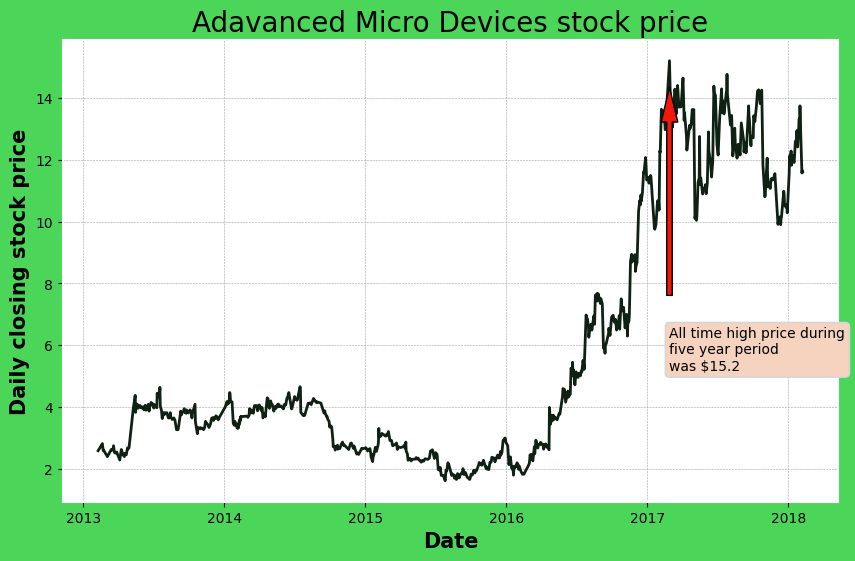

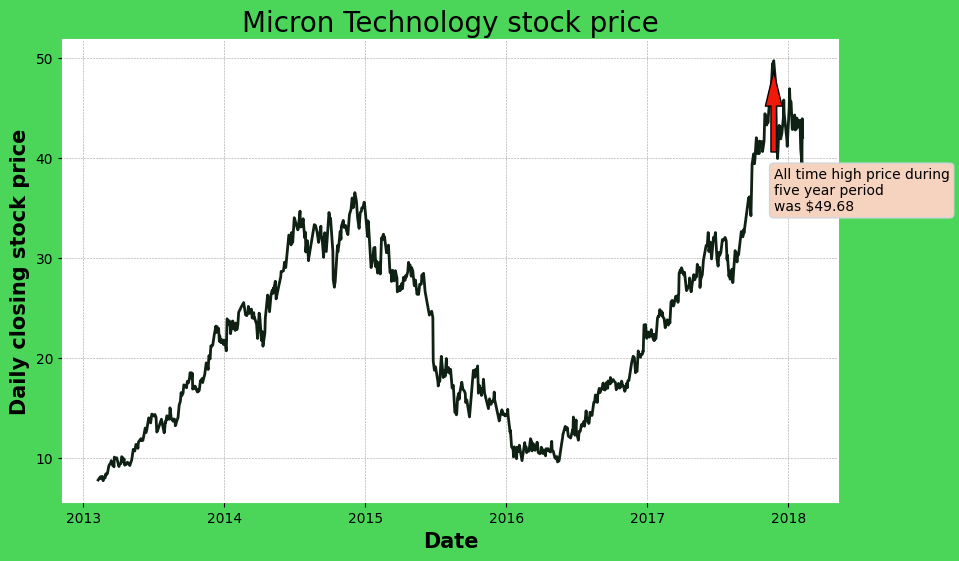

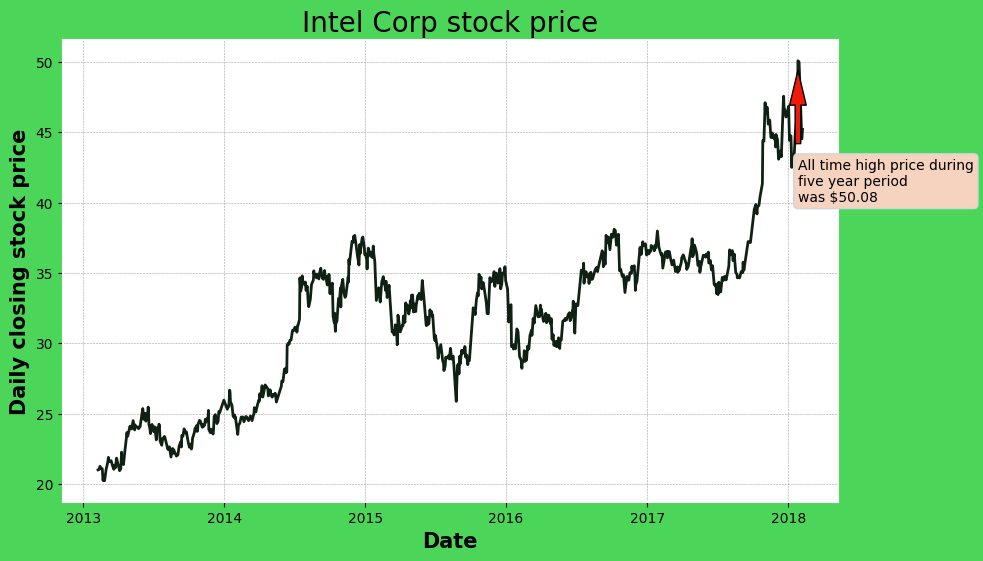

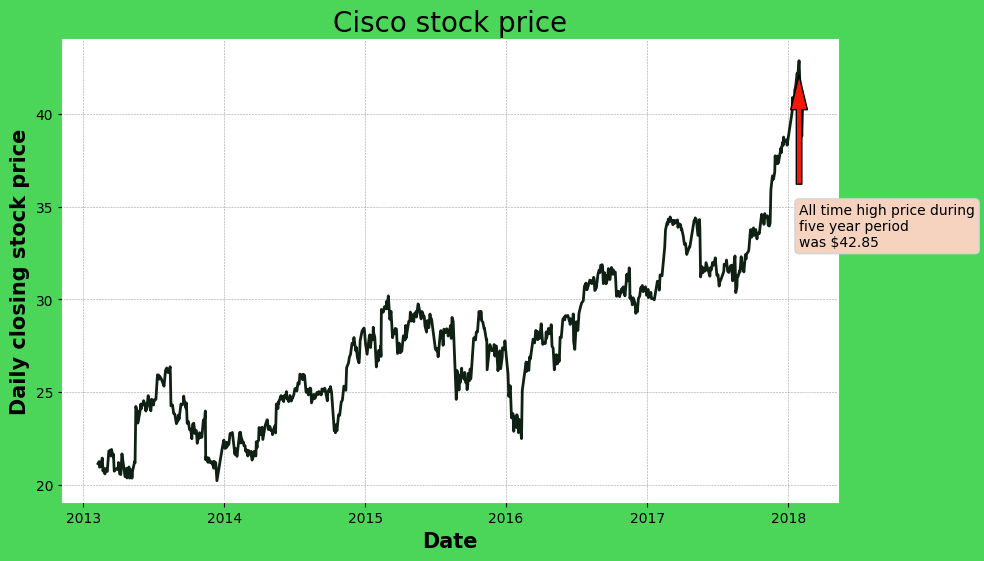

In [ ]:
#plotting allthe closest stock prices over 5 year of interval
def closing_stock_price(df):

    # define highest stock over 5 period of time with date of the same
    high = df['close'].max()
    datetime = df[df['close'] == df['close'].max()]['date'].values

    if df['ticks'].unique()[0] == 'GE':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#ed615c')
    elif df['ticks'].unique()[0] == 'F':
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#ed615c')
    else:
        fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
    ax.plot(df['date'], df['close'], color='#0f2113')
    ax.set_title(f"{df['co_name'].unique()[0]} stock price", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily closing stock price", fontsize=15)
    if df['ticks'].unique()[0] == 'AAPL':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-35),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'F':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-3),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'FB':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-50),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'MSFT':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-20),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    elif df['ticks'].unique()[0] == 'MU':
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-15),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))
    else:
        ax.annotate(f"All time high price during\nfive year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-10),
                bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),
                 arrowprops=dict(facecolor='#f0190a',headlength=25, shrink=0.1))

    plt.show()

# plot of all the closing stocks
closing_stock_price(bac_df)
closing_stock_price(aapl_df)
closing_stock_price(ge_df)
closing_stock_price(f_df)
closing_stock_price(fb_df)
closing_stock_price(msft_df)
closing_stock_price(amd_df)
closing_stock_price(mu_df)
closing_stock_price(intc_df)
closing_stock_price(csco_df)

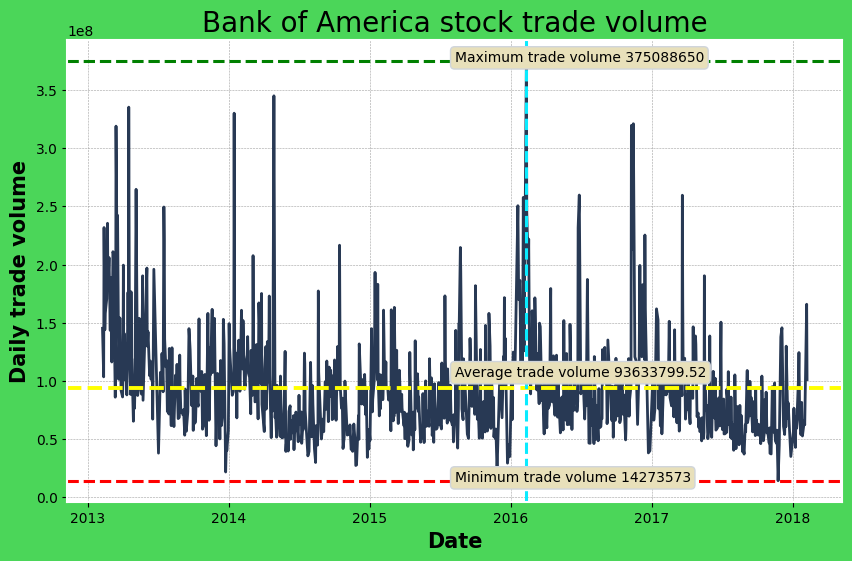

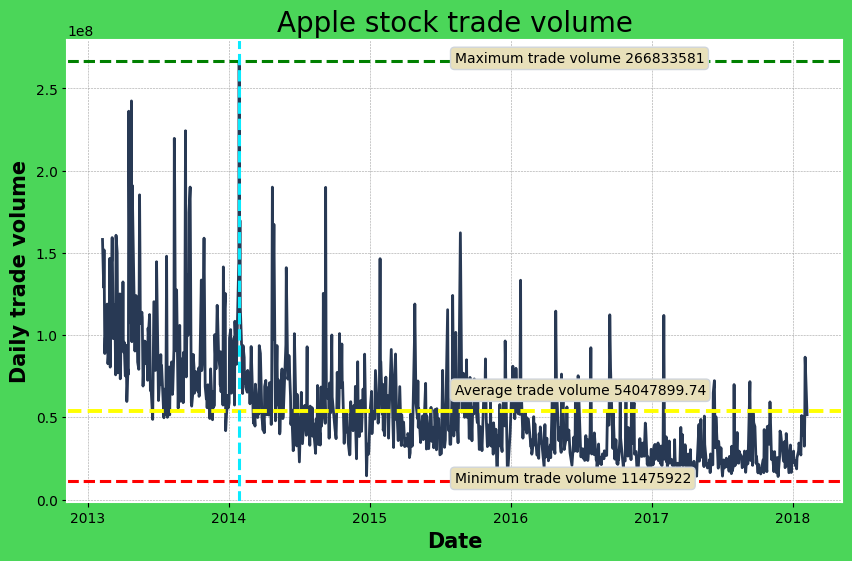

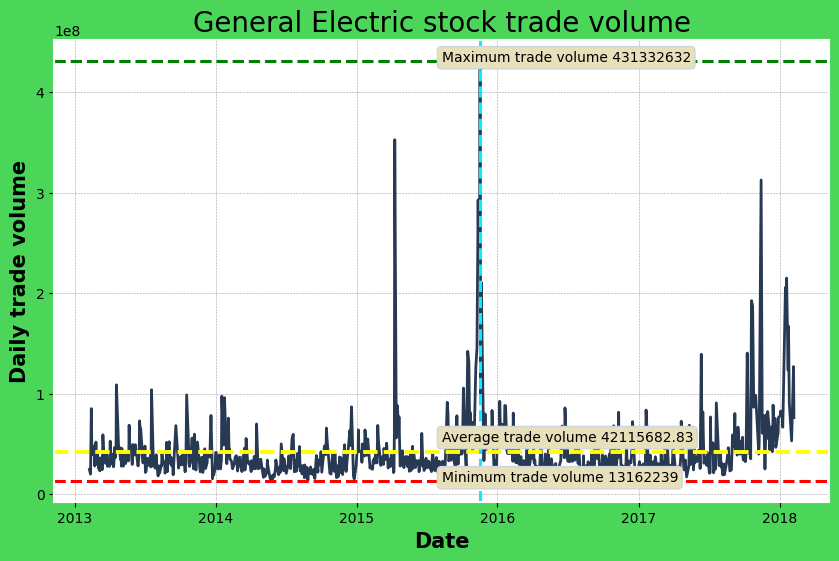

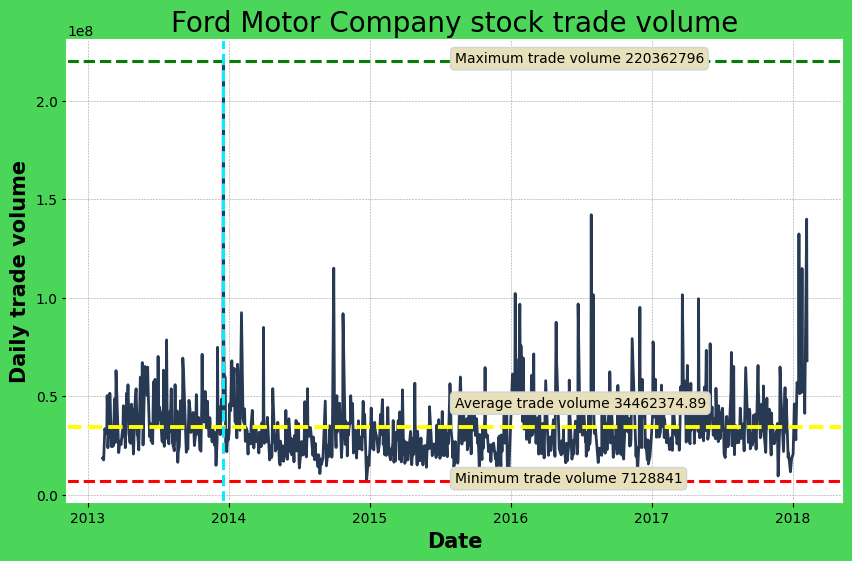

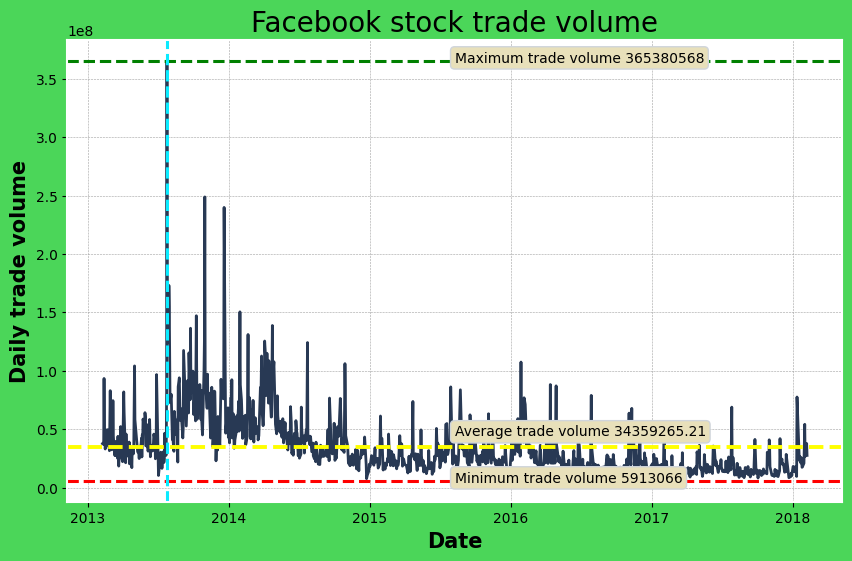

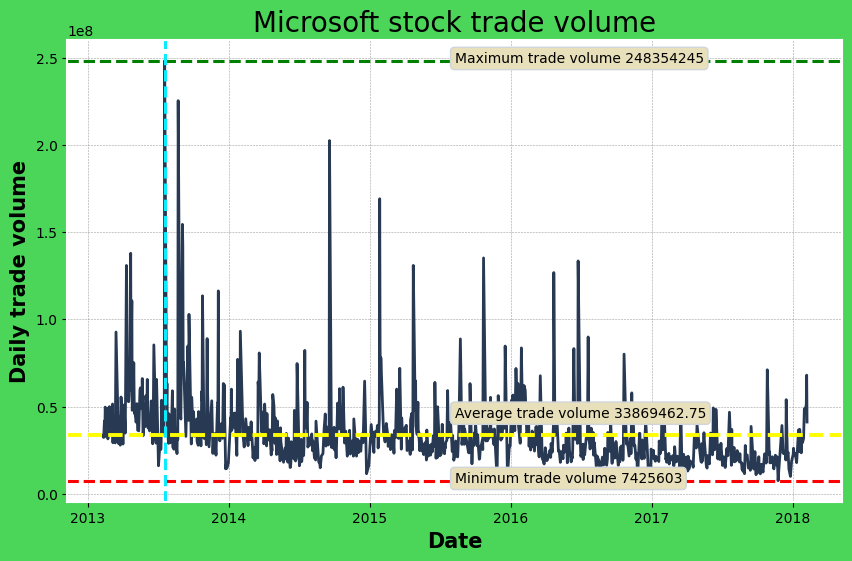

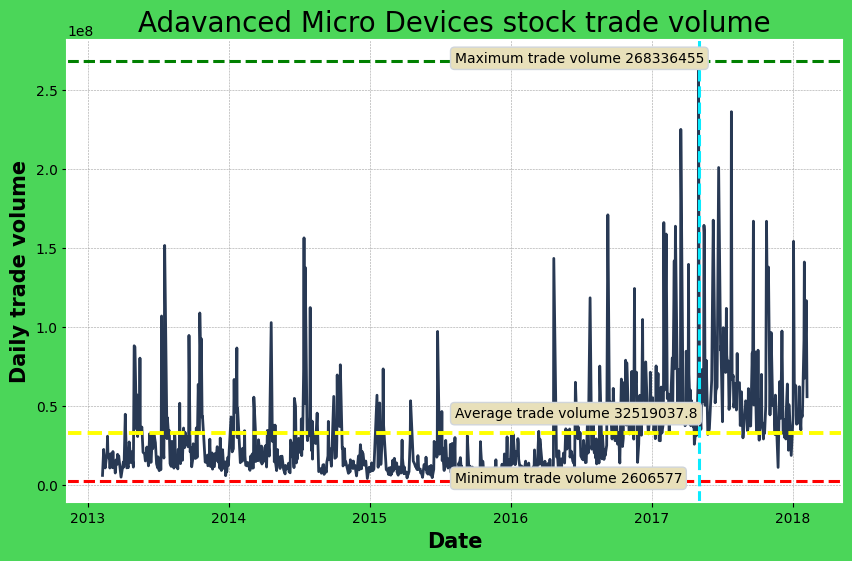

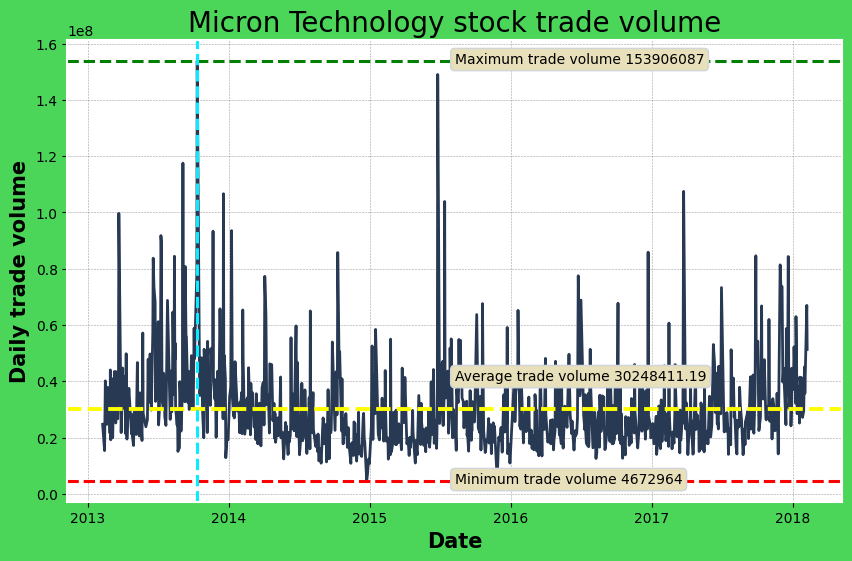

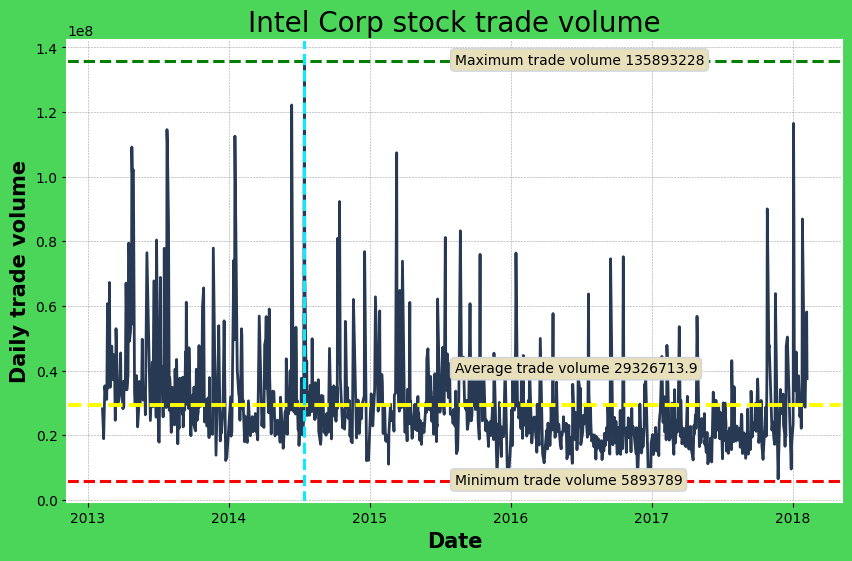

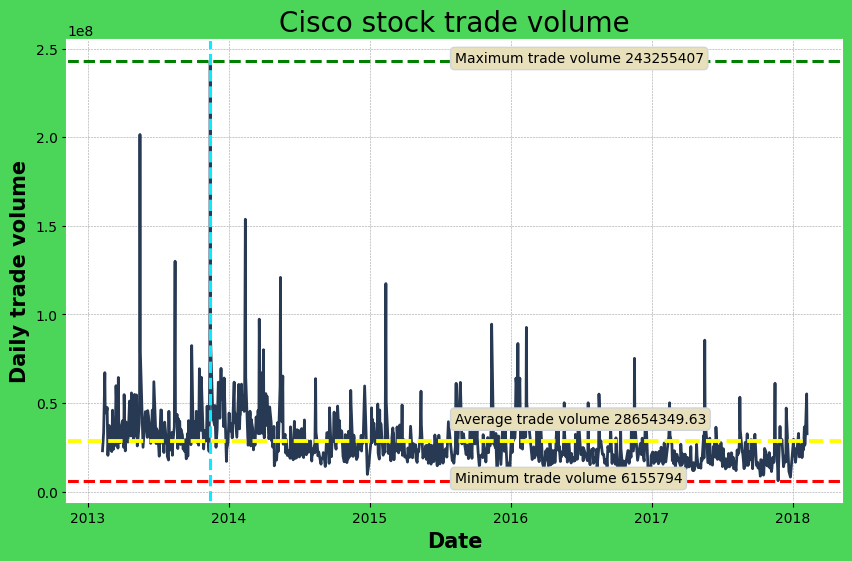

In [ ]:
def trade_vol(df):# volume visualize

    # x and y coords for average trade volume
    ave_x = df['date'].mean()
    ave_y = df['volume'].mean()
    # y coord for max trade vol
    max_y = df['volume'].max()
    # y coord for min trade vol
    min_y = df['volume'].min()

    fig, ax = plt.subplots(figsize=(10,6), facecolor='#4bd659')
    ax.plot(df['date'], df['volume'], color='#283954')
    ax.set_title(f"{df['co_name'].unique()[0]} stock trade volume", fontsize=20)
    ax.set_xlabel("Date", fontsize=15)
    ax.set_ylabel("Daily trade volume", fontsize=15)
    ax.axhline(y=df['volume'].max(), linestyle='--', lw=2.2, color='green')
    ax.axhline(y=df['volume'].min(), linestyle='--',lw=2.2, color='red')
    ax.axhline(y=df['volume'].mean(), linestyle='--',lw=2.8, color='yellow')
    ax.axvline(x=df[df['volume'] == max_y]['date'].values, ls='--', lw='2.2', color='#0aebff')
    ax.annotate(f"Average trade volume {round(df['volume'].mean(),2)}",
                xy=(ave_x,ave_y),xytext=(ave_x,ave_y + 10000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Maximum trade volume {df['volume'].max()}",
                xy=(ave_x,max_y),xytext=(ave_x,max_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    ax.annotate(f"Minimum trade volume {df['volume'].min()}",
                xy=(ave_x,min_y),xytext=(ave_x,min_y - 1000000),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )

    plt.show()


# plot of all stocks trade volume
trade_vol(bac_df)
trade_vol(aapl_df)
trade_vol(ge_df)
trade_vol(f_df)
trade_vol(fb_df)
trade_vol(msft_df)
trade_vol(amd_df)
trade_vol(mu_df)
trade_vol(intc_df)
trade_vol(csco_df)

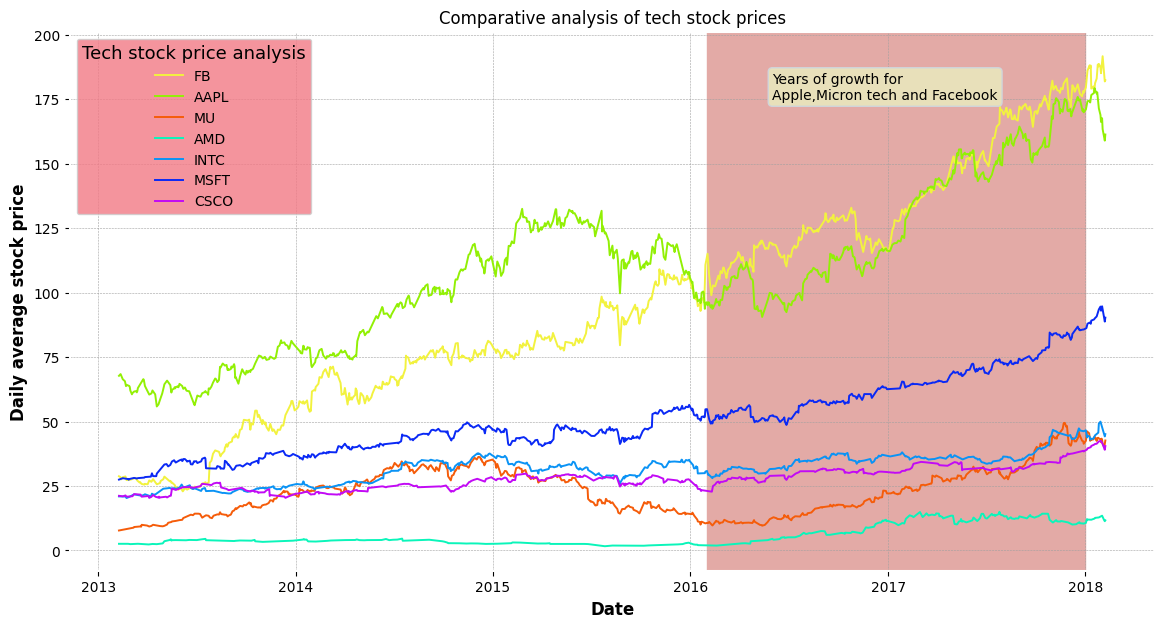

In [ ]:
#techstockdata plot datetime vs daily mean
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(fb_df['date'], fb_df['daily_mean'],label='FB', color='#f2f23f', lw=1.4)
ax.plot(aapl_df['date'], aapl_df['daily_mean'],label='AAPL', color='#92f005', lw=1.4)
ax.plot(mu_df['date'], mu_df['daily_mean'],label='MU', color='#f55c0a', lw=1.4)
ax.plot(amd_df['date'], amd_df['daily_mean'],label='AMD', color='#0af5ba', lw=1.4)
ax.plot(intc_df['date'], intc_df['daily_mean'],label='INTC', color='#0a93f5', lw=1.4)
ax.plot(msft_df['date'], msft_df['daily_mean'],label='MSFT', color='#0a29f5', lw=1.4)
ax.plot(csco_df['date'], csco_df['daily_mean'],label='CSCO', color='#c20af5', lw=1.4)
ax.axvspan(*mdates.datestr2num(['2/1/2016','12/31/2017']), color='#e3aaa6')
ax.set_title("Comparative analysis of tech stock prices")
ax.annotate("Years of growth for\nApple,Micron tech and Facebook", xy=(mdates.datestr2num('6/1/2016'),175),
           bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.set_xlabel("Date")
ax.set_ylabel("Daily average stock price")
ax.legend(facecolor='#f27985', fontsize="medium", title="Tech stock price analysis", title_fontsize=13)

plt.show()

What is volatility?
In finance, volatility (usually denoted by σ) is the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns.

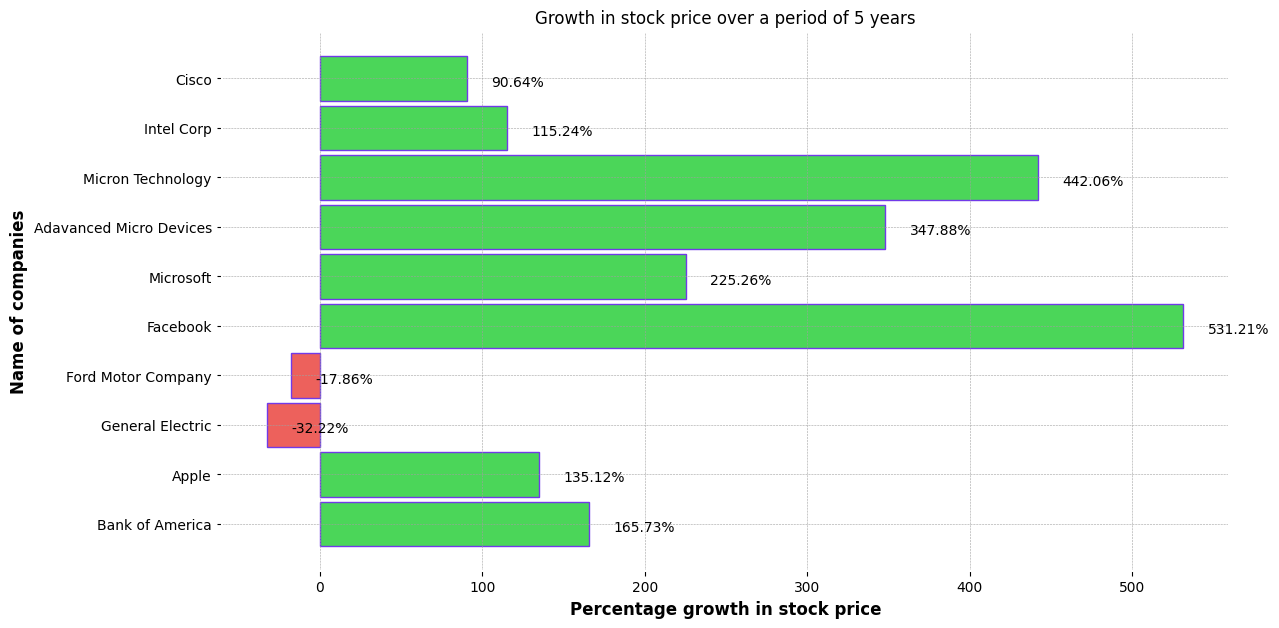

In [ ]:
#growth_rate=finalvalue-initialvalue/initialvalue

list_df = [bac_df, aapl_df, ge_df, f_df, fb_df, msft_df, amd_df, mu_df, intc_df, csco_df]

# loop through the the list_df to find mini and maxi of each stocks
mini = [df[df['date'] == df['date'].min()]['close'].values.item() for df in list_df]
maxi = [df[df['date'] == df['date'].max()]['close'].values.item() for df in list_df]

# find list of abosolute difference between both stock price
diff = np.array(maxi) - np.array(mini)

# find the percentage growth
growth = (diff/mini)*100
growth_list = growth.tolist()
co_name_list = [df['co_name'].unique()[0] for df in list_df]

# visualize the growth of the stocks
fig, ax = plt.subplots(figsize=(13,7))
ax.barh(y=co_name_list, width=growth_list, height=0.9, color=['#4bd659','#4bd659','#ed615c','#ed615c','#4bd659',
                                                             '#4bd659','#4bd659','#4bd659','#4bd659','#4bd659'],
       edgecolor='#713ae8')
for p in ax.patches:
    ax.annotate(f'{round(p.get_width(),2)}%', (p.get_width()+15, p.get_y() +0.3))
ax.set_xlabel('Percentage growth in stock price')
ax.set_ylabel('Name of companies')
ax.set_title("Growth in stock price over a period of 5 years")
plt.show()

In [ ]:
#hypthosis you will often hear that daily return of any stock price is 0% which means you will get zero return on your investment in one day.
#H0: Daily return is zero

#Ha: Daily return is not zero

#We will prove this hypothesis as a one sample t-test as we know population mean but are not aware of std deviation. if p-value is greater than 0.05 than we can not reject the null hypothesis and if it is less than 0.05 than we have to reject the null hypothesis
#null hypothesis test for all 10 stocks
result_dict = {}
for df in list_df:
    result = stats.ttest_1samp(df['daily return'], 0)
    result_dict[df['ticks'].unique()[0]] = result
result_dict


{'BAC': TtestResult(statistic=-0.3532776176429947, pvalue=0.7239395130534507, df=1258),
 'AAPL': TtestResult(statistic=0.41429430560560776, pvalue=0.6787292124343913, df=1258),
 'GE': TtestResult(statistic=-0.6899014787481074, pvalue=0.4903833915917716, df=1258),
 'F': TtestResult(statistic=-1.829967497402379, pvalue=0.06749132535767648, df=1258),
 'FB': TtestResult(statistic=0.43179923117451596, pvalue=0.6659613318143065, df=1258),
 'MSFT': TtestResult(statistic=2.936864998172622, pvalue=0.00337582087561039, df=1258),
 'AMD': TtestResult(statistic=0.5320769266138293, pvalue=0.5947666691710993, df=1258),
 'MU': TtestResult(statistic=-0.3912233565721498, pvalue=0.6956983959552626, df=1258),
 'INTC': TtestResult(statistic=3.0472693720373076, pvalue=0.002357434011831407, df=1258),
 'CSCO': TtestResult(statistic=2.6892871186777536, pvalue=0.007255138945761972, df=1258)}

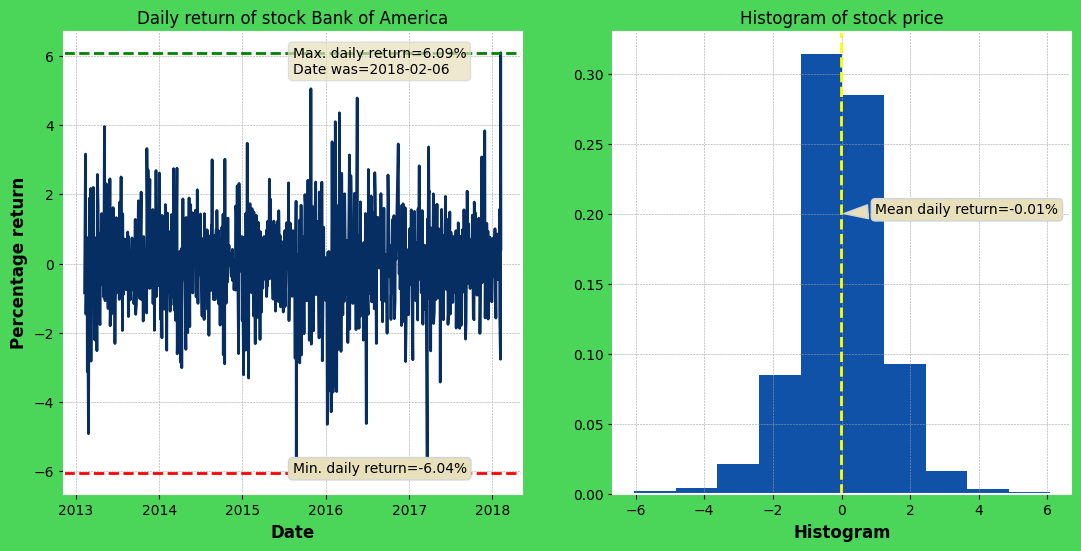

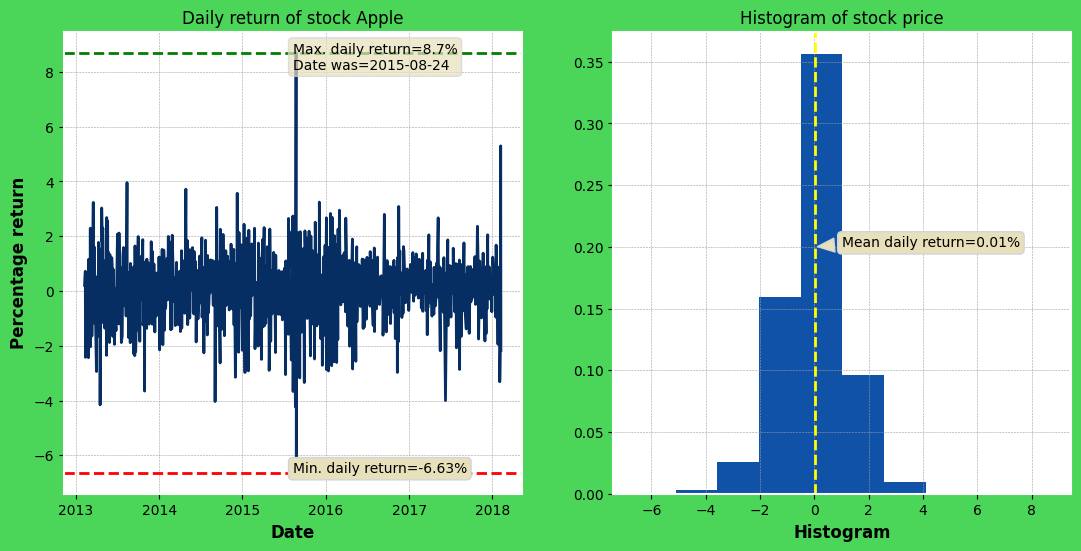

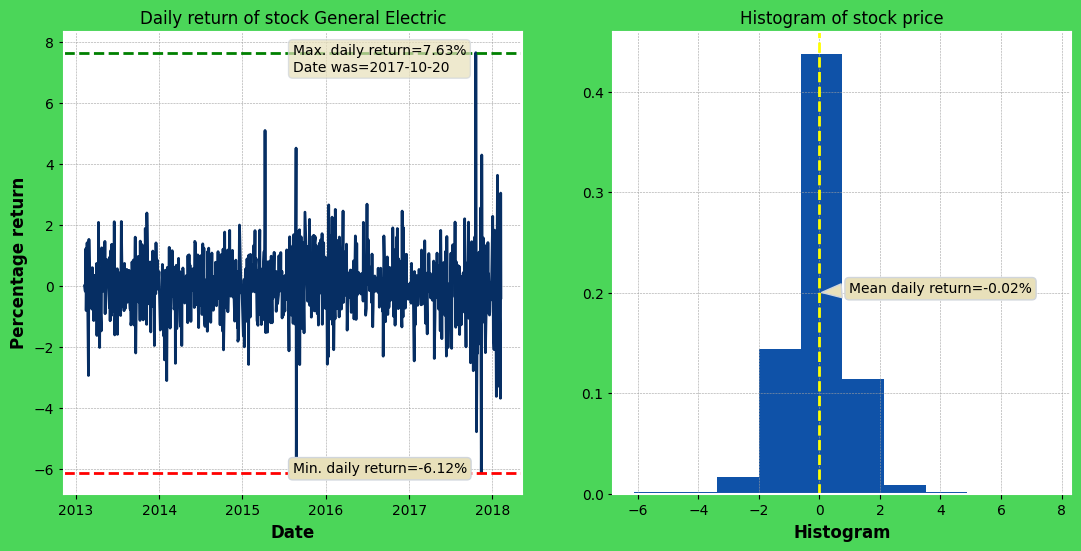

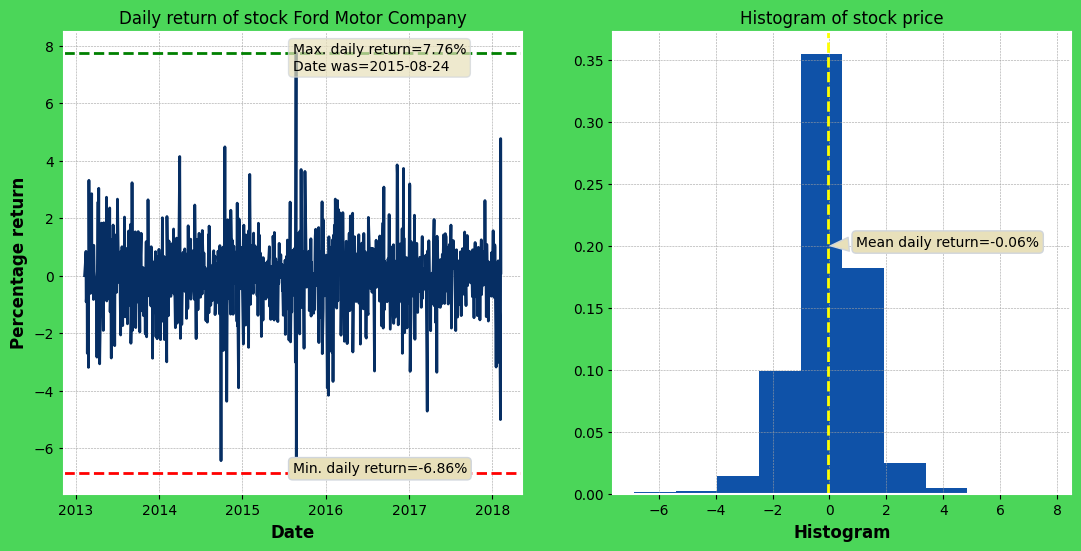

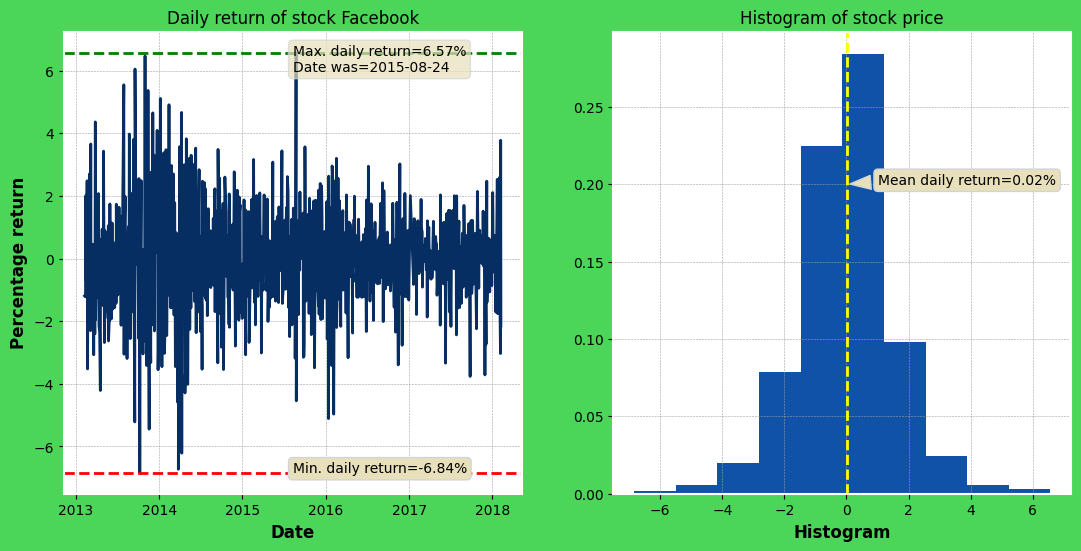

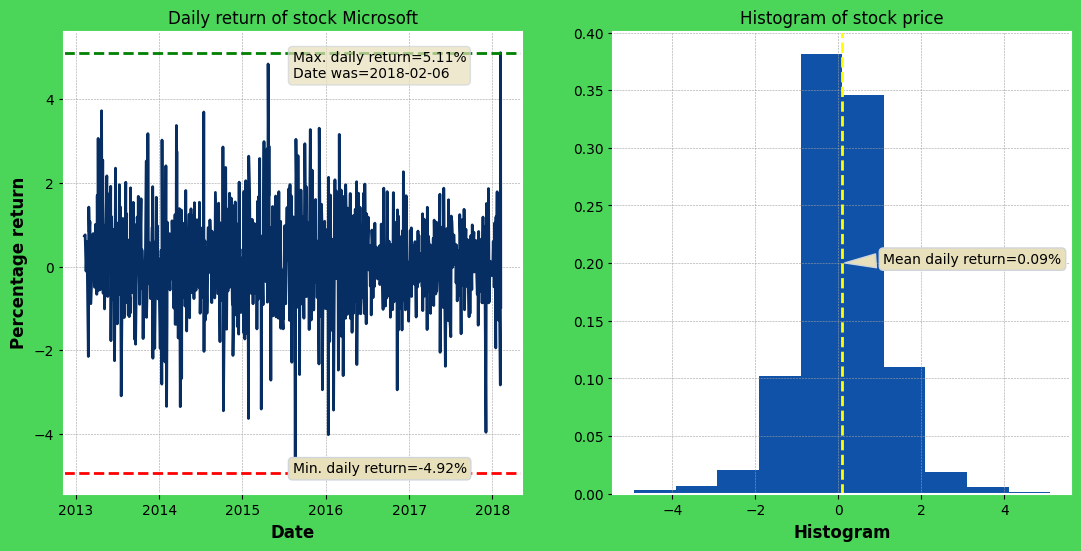

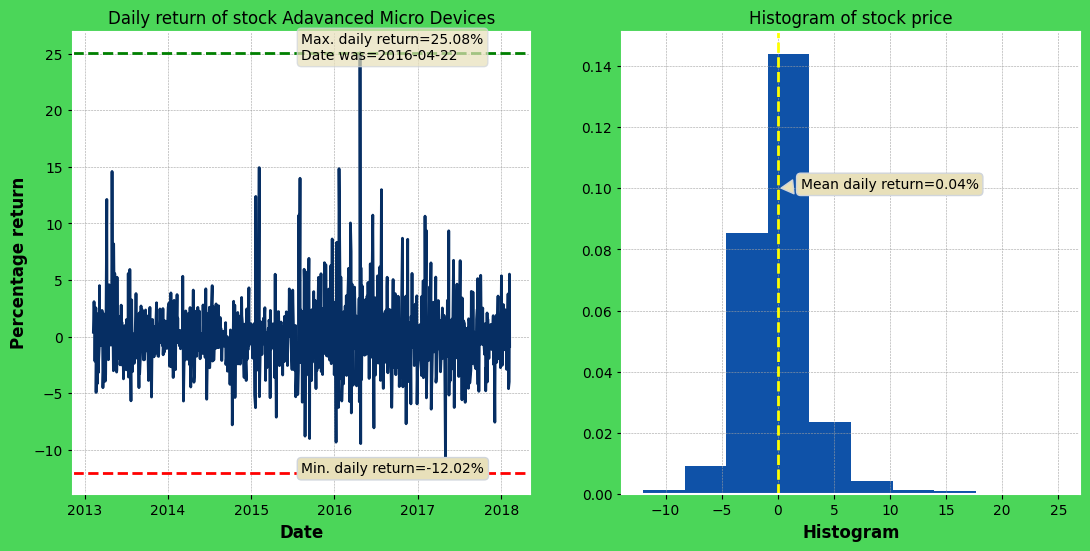

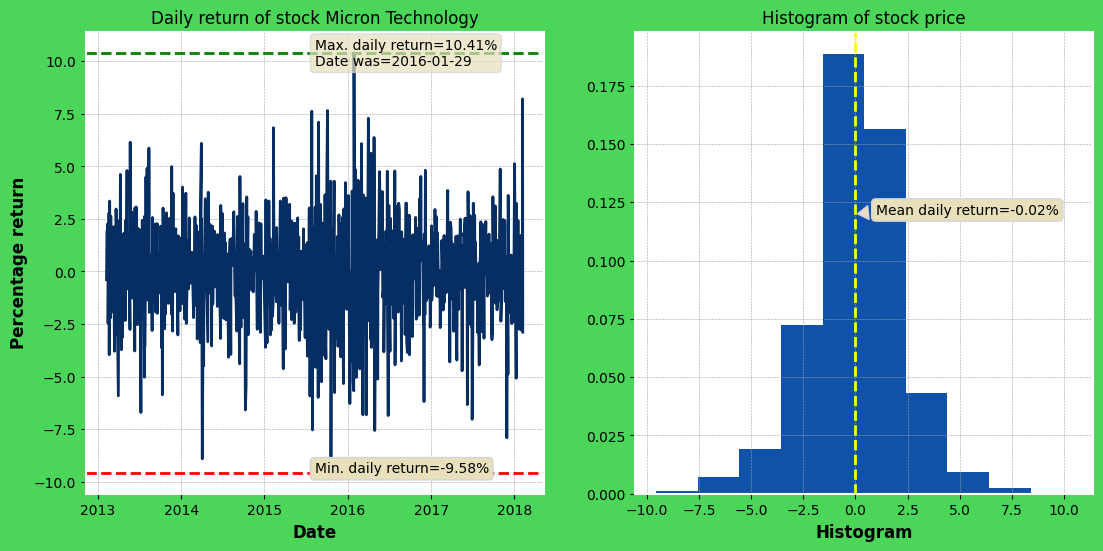

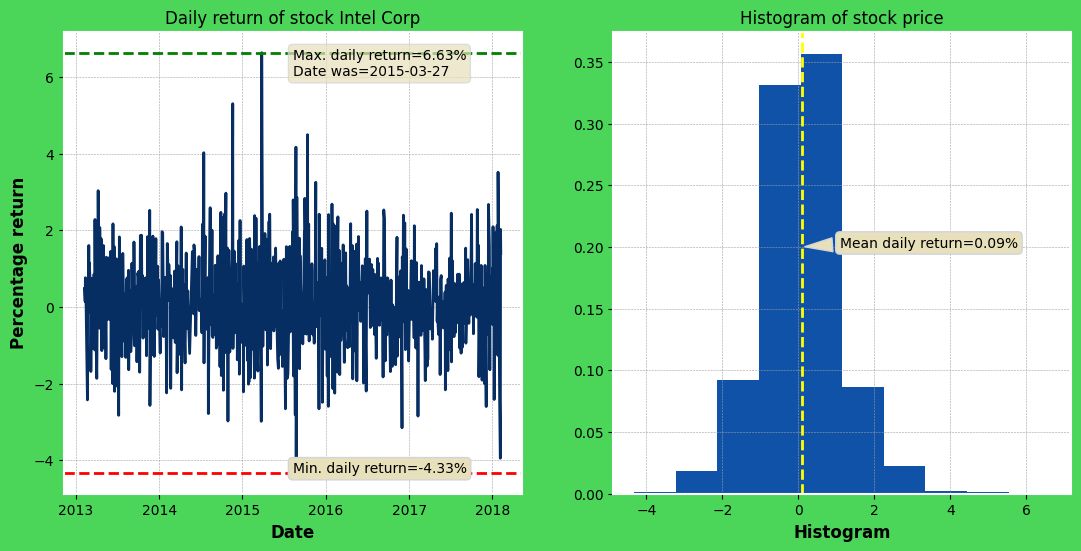

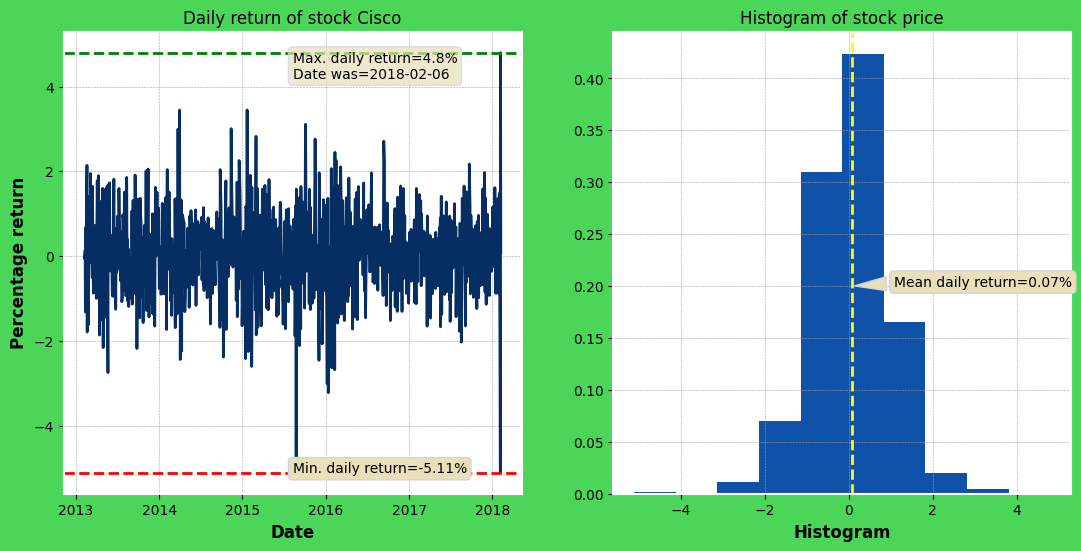

In [ ]:
def daily_return(df):

    # assign variables to annotation positions
    ave_x = df['date'].mean()
    y_max = df['daily return'].max()
    y_max_date = df[df['daily return'] == df['daily return'].max()]['date'].values
    dt = pd.to_datetime(y_max_date, '%Y%m%d%H%M%S')
    xb = dt.item().date()
    y_min = df['daily return'].min()
    y_mean = df['daily return'].mean()

    plt.figure(figsize=(13,6), facecolor='#4bd659')

    plt.subplot(121)
    plt.plot(df['date'], df['daily return'], color='#062e63')
    plt.axhline(y=df['daily return'].max(), color='green', ls='--')
    plt.axhline(y=df['daily return'].min(), color='red', ls='--')
    plt.xlabel('Date')
    plt.ylabel("Percentage return")
    plt.annotate(f"Min. daily return={round(df['daily return'].min(),2)}%",
                xy=(ave_x,y_min),xytext=(ave_x,y_min),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db')
                 )
    plt.annotate(f"Max. daily return={round(df['daily return'].max(),2)}%\nDate was={xb}",
                xy=(ave_x,y_max),xytext=(ave_x,y_max-0.6),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db', alpha=0.7)
                 )
    plt.title(f"Daily return of stock {df['co_name'].unique()[0]}")

    plt.subplot(122)
    plt.hist(df['daily return'], density=True, color='#0f52a8')
    plt.xlabel('Histogram')
    plt.axvline(x=df['daily return'].mean(), color='yellow', ls='--')
    if df['ticks'].unique()[0] == 'AMD':
        plt.annotate(f"Mean daily return={round(df['daily return'].mean(),2)}%",
                xy=(y_mean,0.10),xytext=(y_mean+2,0.10),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",facecolor='#e8e0ba',
                            edgecolor='#d0d5db',
                            relpos=(0.1,0.5)
                            )
                 )
    elif df['ticks'].unique()[0] == 'MU':
        plt.annotate(f"Mean daily return={round(df['daily return'].mean(),2)}%",
                xy=(y_mean,0.12),xytext=(y_mean+1,0.12),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",facecolor='#e8e0ba',
                            edgecolor='#d0d5db',
                            relpos=(0.1,0.5)
                            )
                 )
    else:
        plt.annotate(f"Mean daily return={round(df['daily return'].mean(),2)}%",
                xy=(y_mean,0.20),xytext=(y_mean+1,0.20),
                bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'),
                arrowprops=dict(arrowstyle="wedge,tail_width=1.",facecolor='#e8e0ba',
                            edgecolor='#d0d5db',
                            relpos=(0.1,0.5)
                            )
                 )
    plt.title(f"Histogram of stock price")

    plt.show()

# call the function with dataframe
daily_return(bac_df)
daily_return(aapl_df)
daily_return(ge_df)
daily_return(f_df)
daily_return(fb_df)
daily_return(msft_df)
daily_return(amd_df)
daily_return(mu_df)
daily_return(intc_df)
daily_return(csco_df)

Technical analysis of stocks using candle stick charts and moving average

In [ ]:
def candlestick_chart(df):
    trace = go.Candlestick(x=df['date'],
                          open=df['open'],
                          high=df['high'],
                          low=df['low'],
                          close=df['close'])
    layout ={
    'title': f"{df['co_name'].unique()[0]} Historical Stock Price",
    'xaxis': {'title': 'Date'
             },
    'yaxis': {'title': 'Stock Price (USD$)'}
}


    data = [trace]

    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(xaxis_rangeslider_visible=False, paper_bgcolor='#4bd659')
    fig.show(renderer="colab")

# plot the charts using this function
candlestick_chart(bac_df)
candlestick_chart(aapl_df)
candlestick_chart(ge_df)
candlestick_chart(f_df)
candlestick_chart(fb_df)
candlestick_chart(msft_df)
candlestick_chart(amd_df)
candlestick_chart(mu_df)
candlestick_chart(intc_df)
candlestick_chart(csco_df)

In [ ]:
#moving average curves
def mav_function(df):

    # calclulate moving averages of 10,50 and 200 days
    df['10_d_avg'] = df['close'].rolling(window=10).mean()
    df['50_d_avg'] = df['close'].rolling(window=50).mean()
    df['200_d_avg'] = df['close'].rolling(window=200).mean()

    return df

# let's analyse apple and facebook stocks using moving averages methods
aapl_df = mav_function(aapl_df)
fb_df = mav_function(fb_df)

In [ ]:

def mav_chart(df):
    df = df.set_index('date')

    fig = tls.make_subplots(rows=2, cols=1, shared_xaxes=True)
    # set colors and cols names to be plotted
    colors = ['#ff4500', '#92a1cf', '#6E6E6E']
    avgs = ['10_d_avg','50_d_avg','200_d_avg']

    for col, c in zip(avgs, colors):
        fig.append_trace({'x': df.index, 'y': df[col], 'type': 'scatter', 'name': col, 'line': {'color': c}},1,1)
    for col in ['close']:
        fig.append_trace({'x': df.index, 'y': df[col], 'type': 'scatter', 'name': 'closing price', 'line': {'color': '#393f5e'}},2,1)

    fig['layout'].update(height=800,title=f"Relationship between Moving averages <br> and Closing Price of {df['co_name'].unique()[0]}",
                    paper_bgcolor='#4bd659', plot_bgcolor='#F2DFCE')
    fig.show(renderer="colab")
mav_chart(aapl_df)
mav_chart(fb_df)

In [ ]:
def plot_ema(df, company_name, periods=[20, 50]):
    df['EMA20'] = df['close'].ewm(span=periods[0], adjust=False).mean()
    df['EMA50'] = df['close'].ewm(span=periods[1], adjust=False).mean()

    fig = go.Figure(data=[go.Candlestick(x=df['date'],
                                        open=df['open'],
                                        high=df['high'],
                                        low=df['low'],
                                        close=df['close']),
                          go.Scatter(x=df['date'], y=df['EMA20'], line=dict(color='blue', width=1), name='EMA20'),
                          go.Scatter(x=df['date'], y=df['EMA50'], line=dict(color='red', width=1), name='EMA50')])

    fig.update_layout(title=f"{company_name} Stock Price with EMA",
                      xaxis_title='Date',
                      yaxis_title='Price',
                      xaxis_rangeslider_visible=False)

    fig.show(renderer="colab")

# Plot EMA for AAPL and FB
plot_ema(aapl_df, "AAPL")
plot_ema(fb_df, "FB")

Stock price forecasting: Modelling and forecast

In [ ]:
from statsmodels.tsa.stattools import adfuller
result_aapl = adfuller(aapl_df['close'])
print('ADF Statistic for AAPL:', result_aapl[0])
print('p-value for AAPL:', result_aapl[1])
print('Critical Values for AAPL:', result_aapl[4])
#stationarity check
result_fb = adfuller(fb_df['close'])
print('ADF Statistic for FB:', result_fb[0])
print('p-value for FB:', result_fb[1])
print('Critical Values for FB:', result_fb[4])
#AAPL non STATIONARY AND FB NON STATIONARY

ADF Statistic for AAPL: -0.6650906914089914
p-value for AAPL: 0.8555858445838954
Critical Values for AAPL: {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}
ADF Statistic for FB: 0.17752934531185835
p-value for FB: 0.9709727450489247
Critical Values for FB: {'1%': -3.435592223709696, '5%': -2.8638549702604803, '10%': -2.56800251776}


In [ ]:
def df_formatting(df):
    df = df.loc[:, ['date','close']]
    df.rename(columns={'date':'ds', 'close':'y'}, inplace=True)

    return df

aplph_df = df_formatting(aapl_df)
fbph_df = df_formatting(fb_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz93a8qs5/_ro027x3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz93a8qs5/6r_aazns.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30184', 'data', 'file=/tmp/tmpz93a8qs5/_ro027x3.json', 'init=/tmp/tmpz93a8qs5/6r_aazns.json', 'output', 'file=/tmp/tmpz93a8qs5/prophet_modelu1adjife/prophet_model-20241213115912.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:59:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:59:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz9

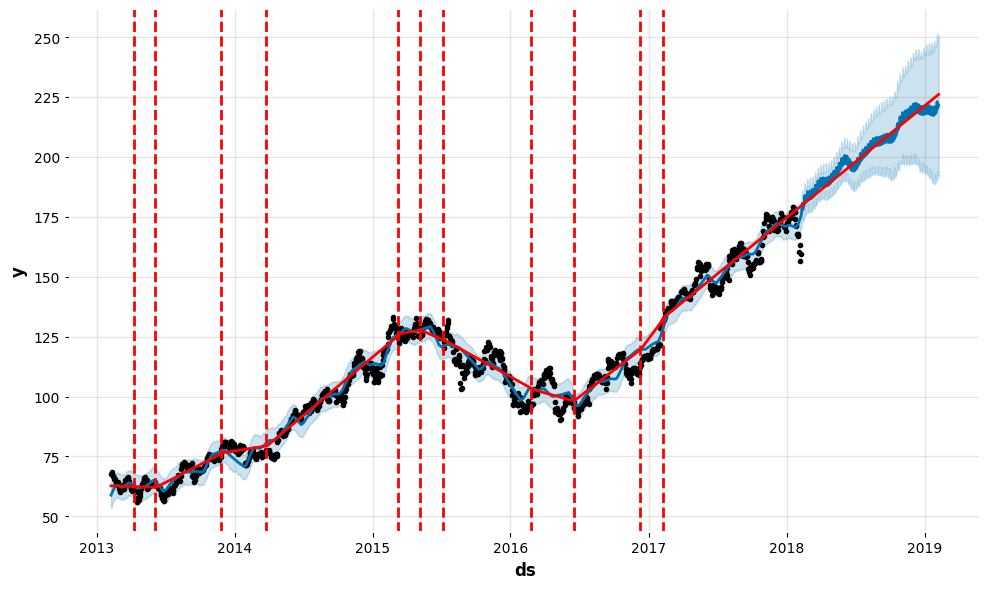

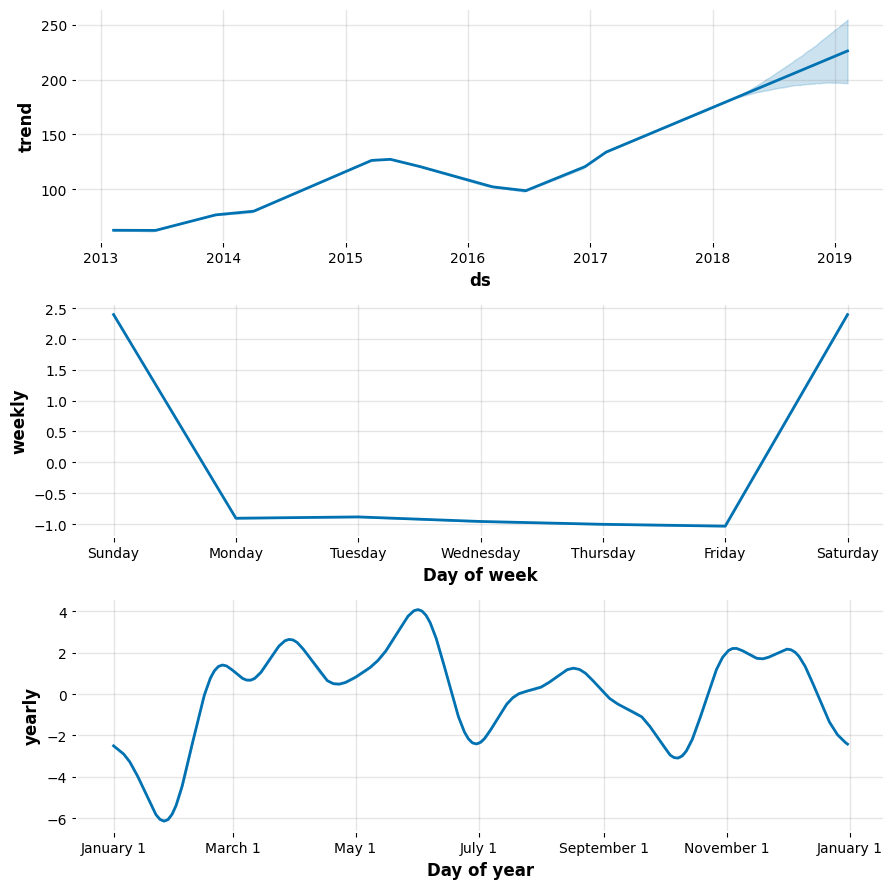

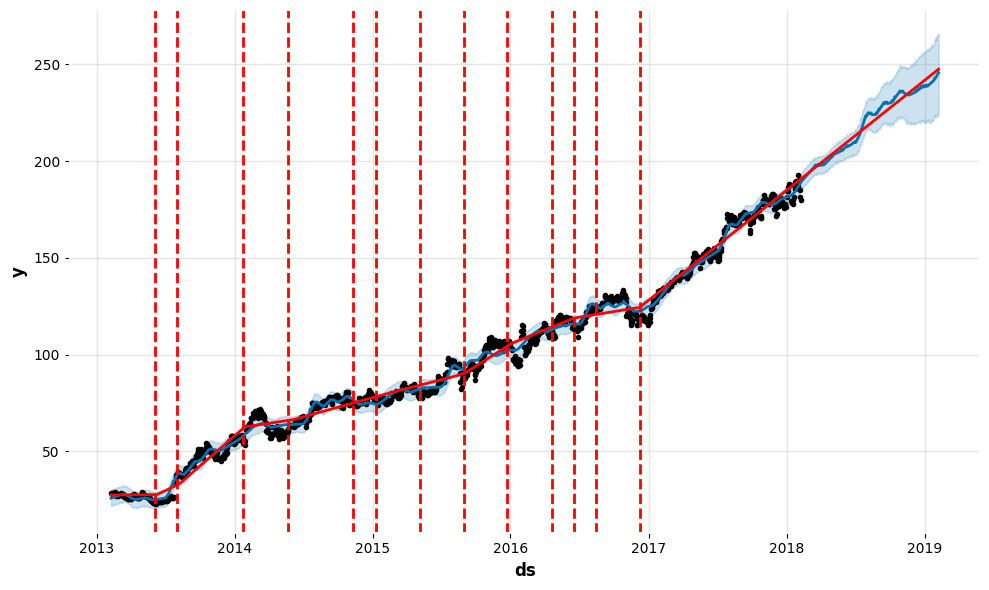

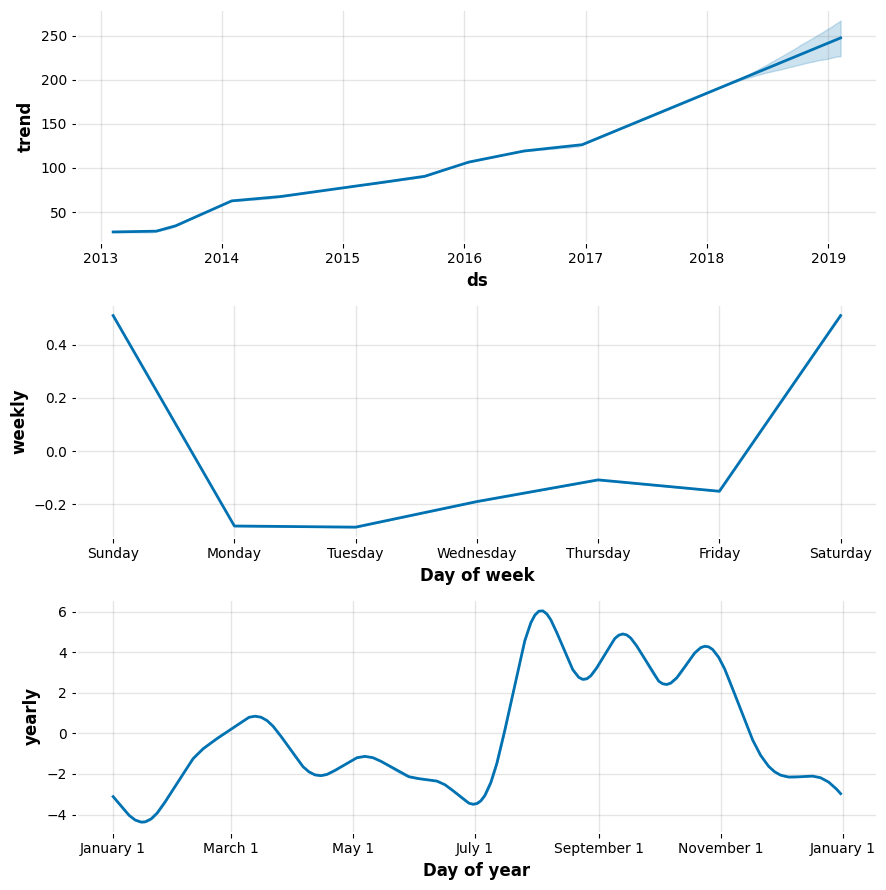

In [ ]:
def price_forecasting(df, period):

    prophet = Prophet(yearly_seasonality = 'auto')
    prophet.fit(df)
    future_price = prophet.make_future_dataframe(periods=period)
    forecasts = prophet.predict(future_price)
    forecast = forecasts[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    # plot the foreasts

    fig = prophet.plot(forecasts)
    a = add_changepoints_to_plot(fig.gca(), prophet, forecasts)

    # plot the components
    fig2 = prophet.plot_components(forecasts)

    return forecasts
forecast_apl=price_forecasting(aplph_df,365)
forecast_fb=price_forecasting(fbph_df,365)

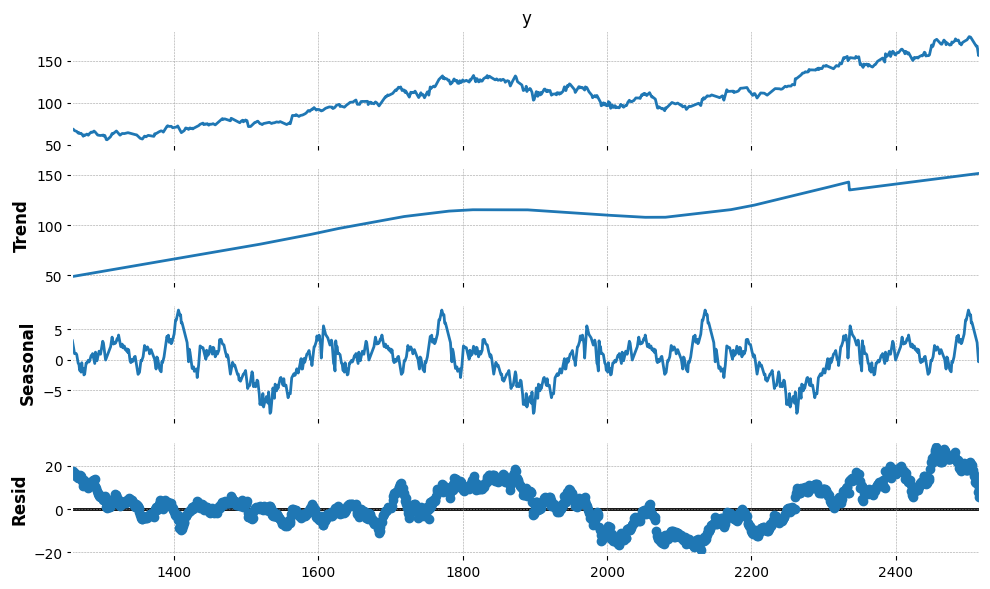

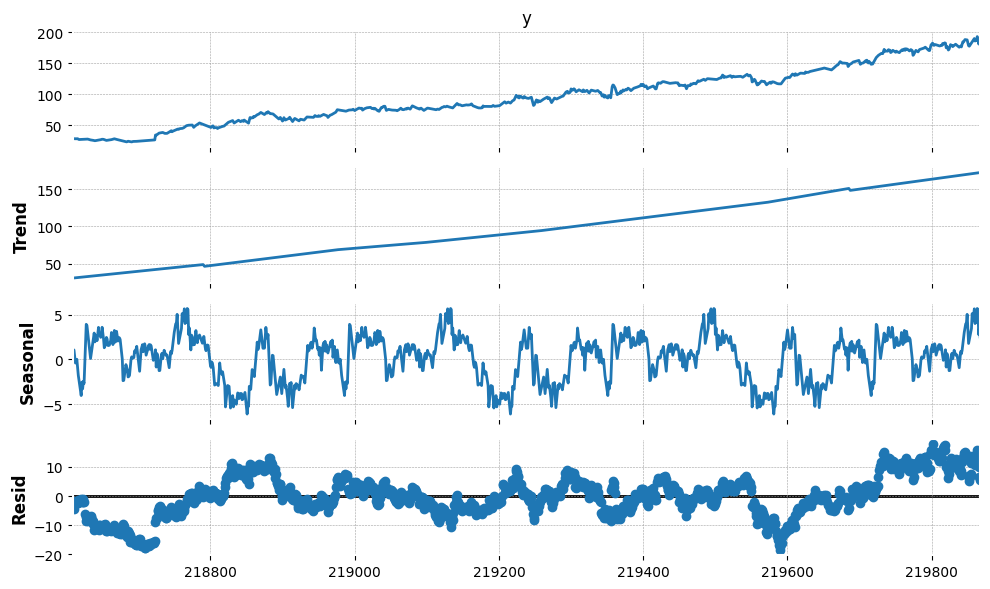

In [ ]:
#time series decompostion seasonal decomposition
def decomposition(df, period):
    # decompistion instance
    result_decom = seasonal_decompose(df['y'], model="additive",
                                      period=period, extrapolate_trend='freq')
    # plot the componenets
    fig = result_decom.plot()
    fig.set_size_inches((10, 6))
    # Tight layout to realign things
    fig.tight_layout()
    plt.show()

    # capture the compoenets
    trend = result_decom.trend
    season = result_decom.seasonal
    reside = result_decom.resid
    return trend, season, reside
tr, se, re = decomposition(aplph_df, 365)
ftr, fse, fre = decomposition(fbph_df, 365)

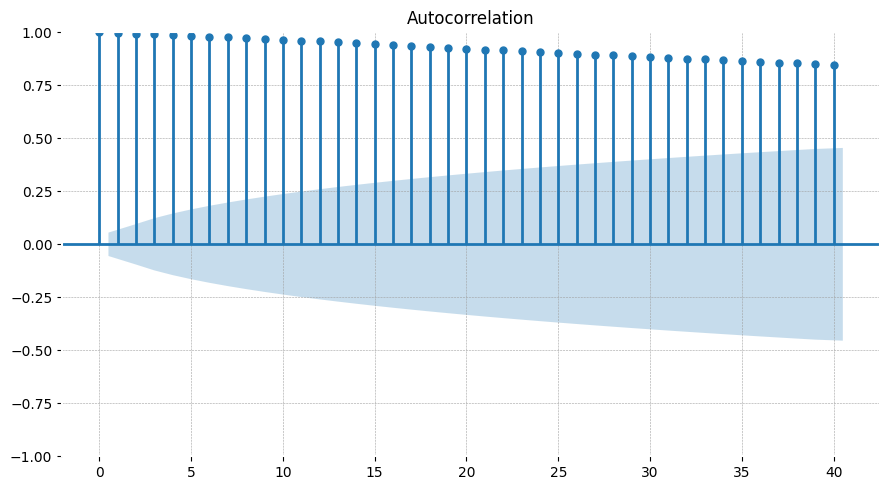

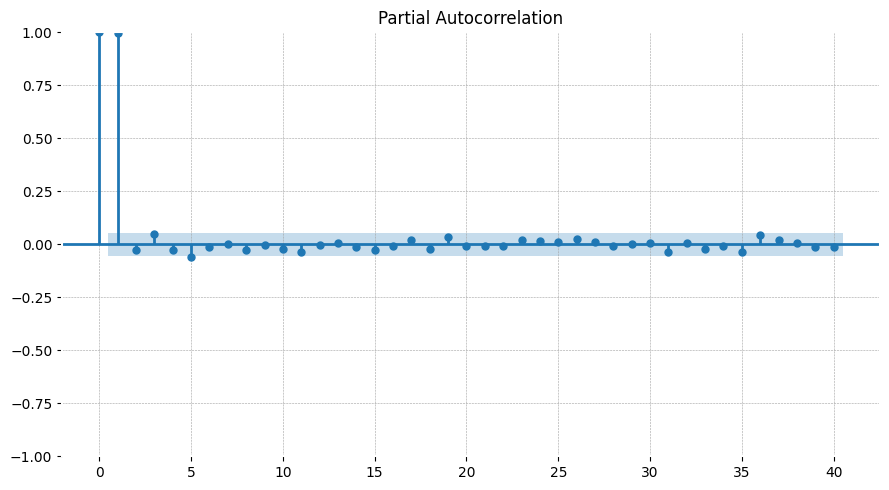

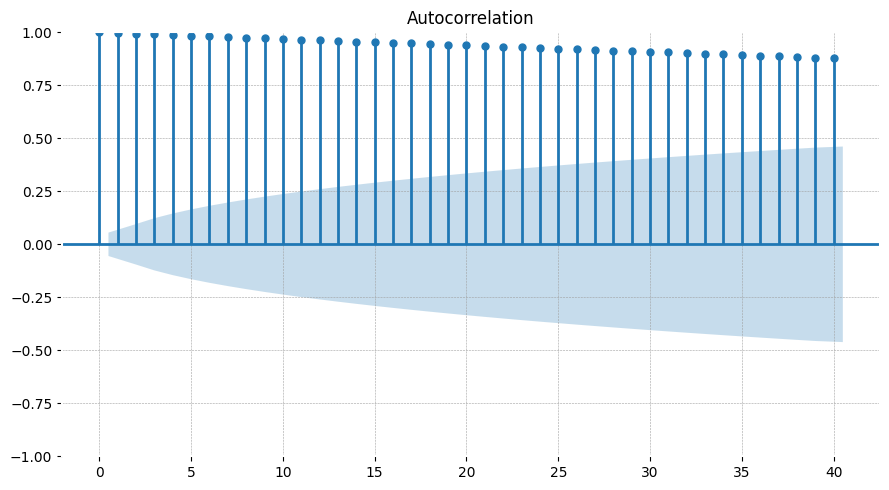

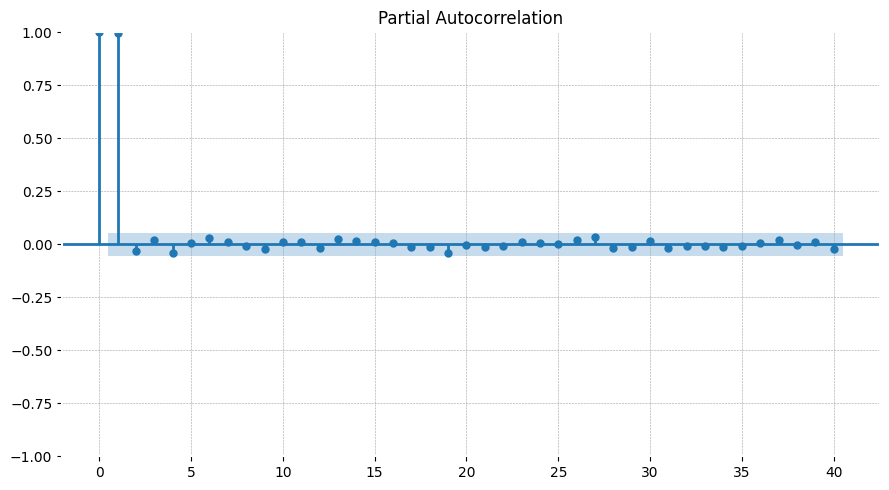

In [ ]:
#autocorrelation and partialautocorrelation plot
def acf_pacf(df, lags):
    var = df['y']
    # plot the acf plot
    fig = plot_acf(var, lags=lags)
    fig.set_size_inches((9, 5))
    fig.tight_layout()
    plt.show()

    # plot the pacf plots
    fig = plot_pacf(var, lags=lags)
    fig.set_size_inches((9,5))
    fig.tight_layout()
    plt.show()
acf_pacf(aplph_df, 40)
acf_pacf(fbph_df, 40)

DIFFERENCING

In [ ]:
#convert non stationary data to stationary
def degree_of_differencing(df, co_name):
    company_ndiffs = ndiffs(df['y'], test = 'adf')
    print(f'The degree of differencing is {company_ndiffs} for {co_name}')

    return company_ndiffs

aapl_ddf = degree_of_differencing(aplph_df, 'APPLE')
fb_ddf = degree_of_differencing(fbph_df, 'Facebook')


The degree of differencing is 1 for APPLE
The degree of differencing is 1 for Facebook


In [ ]:


aplph_df['y_diff'] = aplph_df['y'].diff()
fbph_df['y_diff'] = fbph_df['y'].diff()

TRANSFORMATION

In [ ]:
from scipy.stats import boxcox
aplph_df['y_boxcox'], lambda_apl = boxcox(aplph_df['y'])
print("Lambda for aplph_df: ", lambda_apl)
fbph_df['y_boxcox'], lambda_fb = boxcox(fbph_df['y'])
print("Lambda for fbph_df: ", lambda_fb)
aplph_df.head()
aplph_df.dropna()
fbph_df.dropna()

Lambda for aplph_df:  0.40882152476226474
Lambda for fbph_df:  0.6209652774662235


ds         y  y_diff   y_boxcox  y_smoothed
218610 2013-02-11   28.2600 -0.2850  11.214688     28.2600
218611 2013-02-12   27.3700 -0.8900  10.962358     27.3700
218612 2013-02-13   27.9075  0.5375  11.115114     27.9075
218613 2013-02-14   28.5000  0.5925  11.282213     28.5000
218614 2013-02-15   28.3200 -0.1800  11.231589     28.3200
...           ...       ...     ...        ...         ...
219863 2018-02-01  193.0900  6.2000  40.686660    193.0900
219864 2018-02-02  190.2800 -2.8100  40.303369    190.2800
219865 2018-02-05  181.2600 -9.0200  39.058258    181.2600
219866 2018-02-06  185.3100  4.0500  39.620154    185.3100
219867 2018-02-07  180.1800 -5.1300  38.907618    180.1800

[1258 rows x 5 columns]

OUTLIERS HANDLE

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

def granger_causality_test(data1, data2, maxlag=5):
  """
  Performs Granger causality test.

  Args:
      data1 (pd.Series): First time series data.
      data2 (pd.Series): Second time series data.
      maxlag (int): Maximum lag to test.

  Returns:
      None (Prints the results)
  """
  # Drop NaN values before the test
  data1 = data1.dropna()
  data2 = data2.dropna()
    # Reset index to ensure compatibility with grangercausalitytests
  data1 = data1.reset_index(drop=True)
  data2 = data2.reset_index(drop=True)
  # Ensure both series have the same index and enough observations
  common_index = data1.index.intersection(data2.index)
  data1 = data1.loc[common_index]
  data2 = data2.loc[common_index]

  num_obs = len(common_index)
  if num_obs <= 3 * maxlag + 1:  # +1 for the constant term
      maxlag = int((num_obs - 1) / 3) - 1 #Recalculate maxlag based on available observations
      if maxlag < 1:
          raise ValueError(f"Insufficient observations ({num_obs}) for Granger causality test "
                           f"with maxlag={maxlag}. Need at least {3 * maxlag + 2} observations.")
      else:
          print(f"Warning: Insufficient observations ({num_obs}) for the original maxlag={maxlag}. "
                f"Reducing maxlag to {maxlag} to proceed with the test.")



  print(f"Granger Causality Test: Does {data2.name} cause {data1.name}?")
  test_result = grangercausalitytests(pd.concat([data1, data2], axis=1), maxlag=maxlag, verbose=False)

  for lag in range(1, maxlag + 1):
    p_value = test_result[lag][0]['ssr_ftest'][1]
    print(f"Lag {lag}: p-value = {p_value:.4f}")
    if p_value < 0.05:
      print(f"   Significant: {data2.name} likely causes {data1.name} at lag {lag}")
    else:
      print(f"   Not significant: No evidence of causality at lag {lag}")
  print("-" * 30)

# Apply the test
granger_causality_test(aplph_df['y'], fbph_df['y'], maxlag=5)  # Test if FB causes AAPL
granger_causality_test(fbph_df['y'], aplph_df['y'], maxlag=5)  # Test if AAPL causes FB

Granger Causality Test: Does y cause y?
Lag 1: p-value = 0.1855
   Not significant: No evidence of causality at lag 1
Lag 2: p-value = 0.0237
   Significant: y likely causes y at lag 2
Lag 3: p-value = 0.0494
   Significant: y likely causes y at lag 3
Lag 4: p-value = 0.0961
   Not significant: No evidence of causality at lag 4
Lag 5: p-value = 0.1250
   Not significant: No evidence of causality at lag 5
------------------------------
Granger Causality Test: Does y cause y?
Lag 1: p-value = 0.6026
   Not significant: No evidence of causality at lag 1
Lag 2: p-value = 0.1444
   Not significant: No evidence of causality at lag 2
Lag 3: p-value = 0.1795
   Not significant: No evidence of causality at lag 3
Lag 4: p-value = 0.2632
   Not significant: No evidence of causality at lag 4
Lag 5: p-value = 0.0122
   Significant: y likely causes y at lag 5
------------------------------


In [ ]:

aplph_df.dropna()
fbph_df.dropna()

ds         y  y_diff   y_boxcox  y_smoothed
218610 2013-02-11   28.2600 -0.2850  11.214688     28.2600
218611 2013-02-12   27.3700 -0.8900  10.962358     27.3700
218612 2013-02-13   27.9075  0.5375  11.115114     27.9075
218613 2013-02-14   28.5000  0.5925  11.282213     28.5000
218614 2013-02-15   28.3200 -0.1800  11.231589     28.3200
...           ...       ...     ...        ...         ...
219863 2018-02-01  193.0900  6.2000  40.686660    193.0900
219864 2018-02-02  190.2800 -2.8100  40.303369    190.2800
219865 2018-02-05  181.2600 -9.0200  39.058258    181.2600
219866 2018-02-06  185.3100  4.0500  39.620154    185.3100
219867 2018-02-07  180.1800 -5.1300  38.907618    180.1800

[1258 rows x 5 columns]

In [ ]:
def handle_outliers_iqr(df, column_name='y'):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN (you can choose other handling methods)
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = np.nan

    # Impute NaN values (e.g., with the median)
    df[column_name].fillna(df[column_name].median(), inplace=True)

    return df

# Apply to your dataframes:
aplph_df = handle_outliers_iqr(aplph_df)
fbph_df = handle_outliers_iqr(fbph_df)

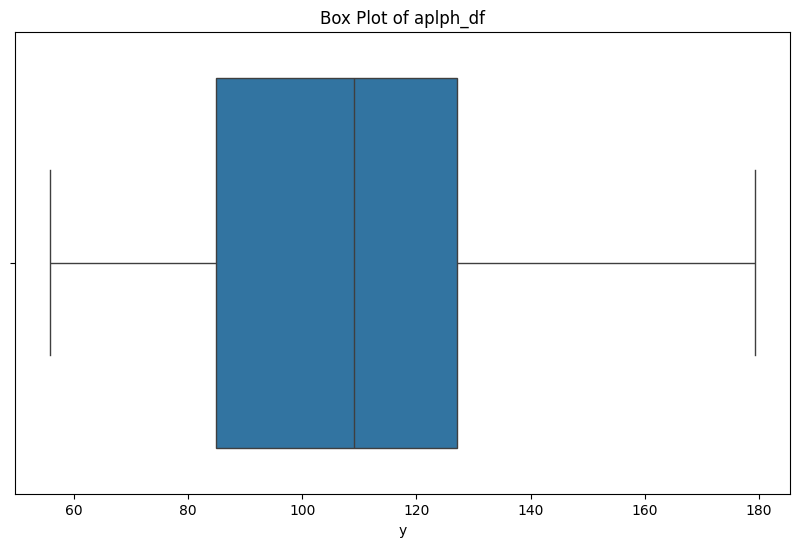

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x=aplph_df['y'])  # Replace 'y' with the column you want to plot
plt.title('Box Plot of aplph_df')
plt.xlabel('y')  # Replace 'y' with the column name
plt.show()

ARIMA MODEL TRAININING & FORECASTING

In [ ]:
def arima_split(df, co_name):
    size = int(len(df)*0.85)
    train_df = (df['y'])[:size]#use y_boxcox for better result
    test_df = (df['y'])[size:]

    print(f"data splits of company {co_name}")
    print(f"Train Size: {len(train_df)}, Test Size: {len(test_df)}")
    print("-------------------------------")

    return train_df, test_df

apl_train, apl_test = arima_split(aplph_df, 'APPLE')
fb_train, fb_test = arima_split(fbph_df, 'FB')


data splits of company APPLE
Train Size: 1070, Test Size: 189
-------------------------------
data splits of company FB
Train Size: 1070, Test Size: 189
-------------------------------


In [ ]:
apl_test.isnull().sum()

0

In [ ]:
def find_best_fit_arima(df, co_name):
    print(f"Arima model for {co_name}")

    model = pm.auto_arima(df, test = 'adf',
                          start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3,
                          d = None, seasonal = True,
                          start_P = 0, m = 3,
                          trace = True, error_action = 'ignore',
                          suppress_warnings = True, stepwise = True,
                          D = 1, information_criterion = 'aic')

    print(model.summary())
    print('\n')

    return model

model_apl = find_best_fit_arima(apl_train, 'APPLE')
model_fb = find_best_fit_arima(fb_train, 'FB')

Arima model for APPLE
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=4.63 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=5049.366, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=4182.451, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=4547.971, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=5056.363, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=4415.621, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=4077.837, Time=0.83 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=3.11 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=5052.410, Time=0.46 sec
 ARIMA(2,0,0)(2,1,0)[3] intercept   : AIC=4068.084, Time=1.26 sec
 ARIMA(2,0,0)(1,1,0)[3] intercept   : AIC=4165.923, Time=2.15 sec
 ARIMA(2,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=6.06 sec
 ARIMA(2,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(2,0,1)(2,1,0)[3] intercept   

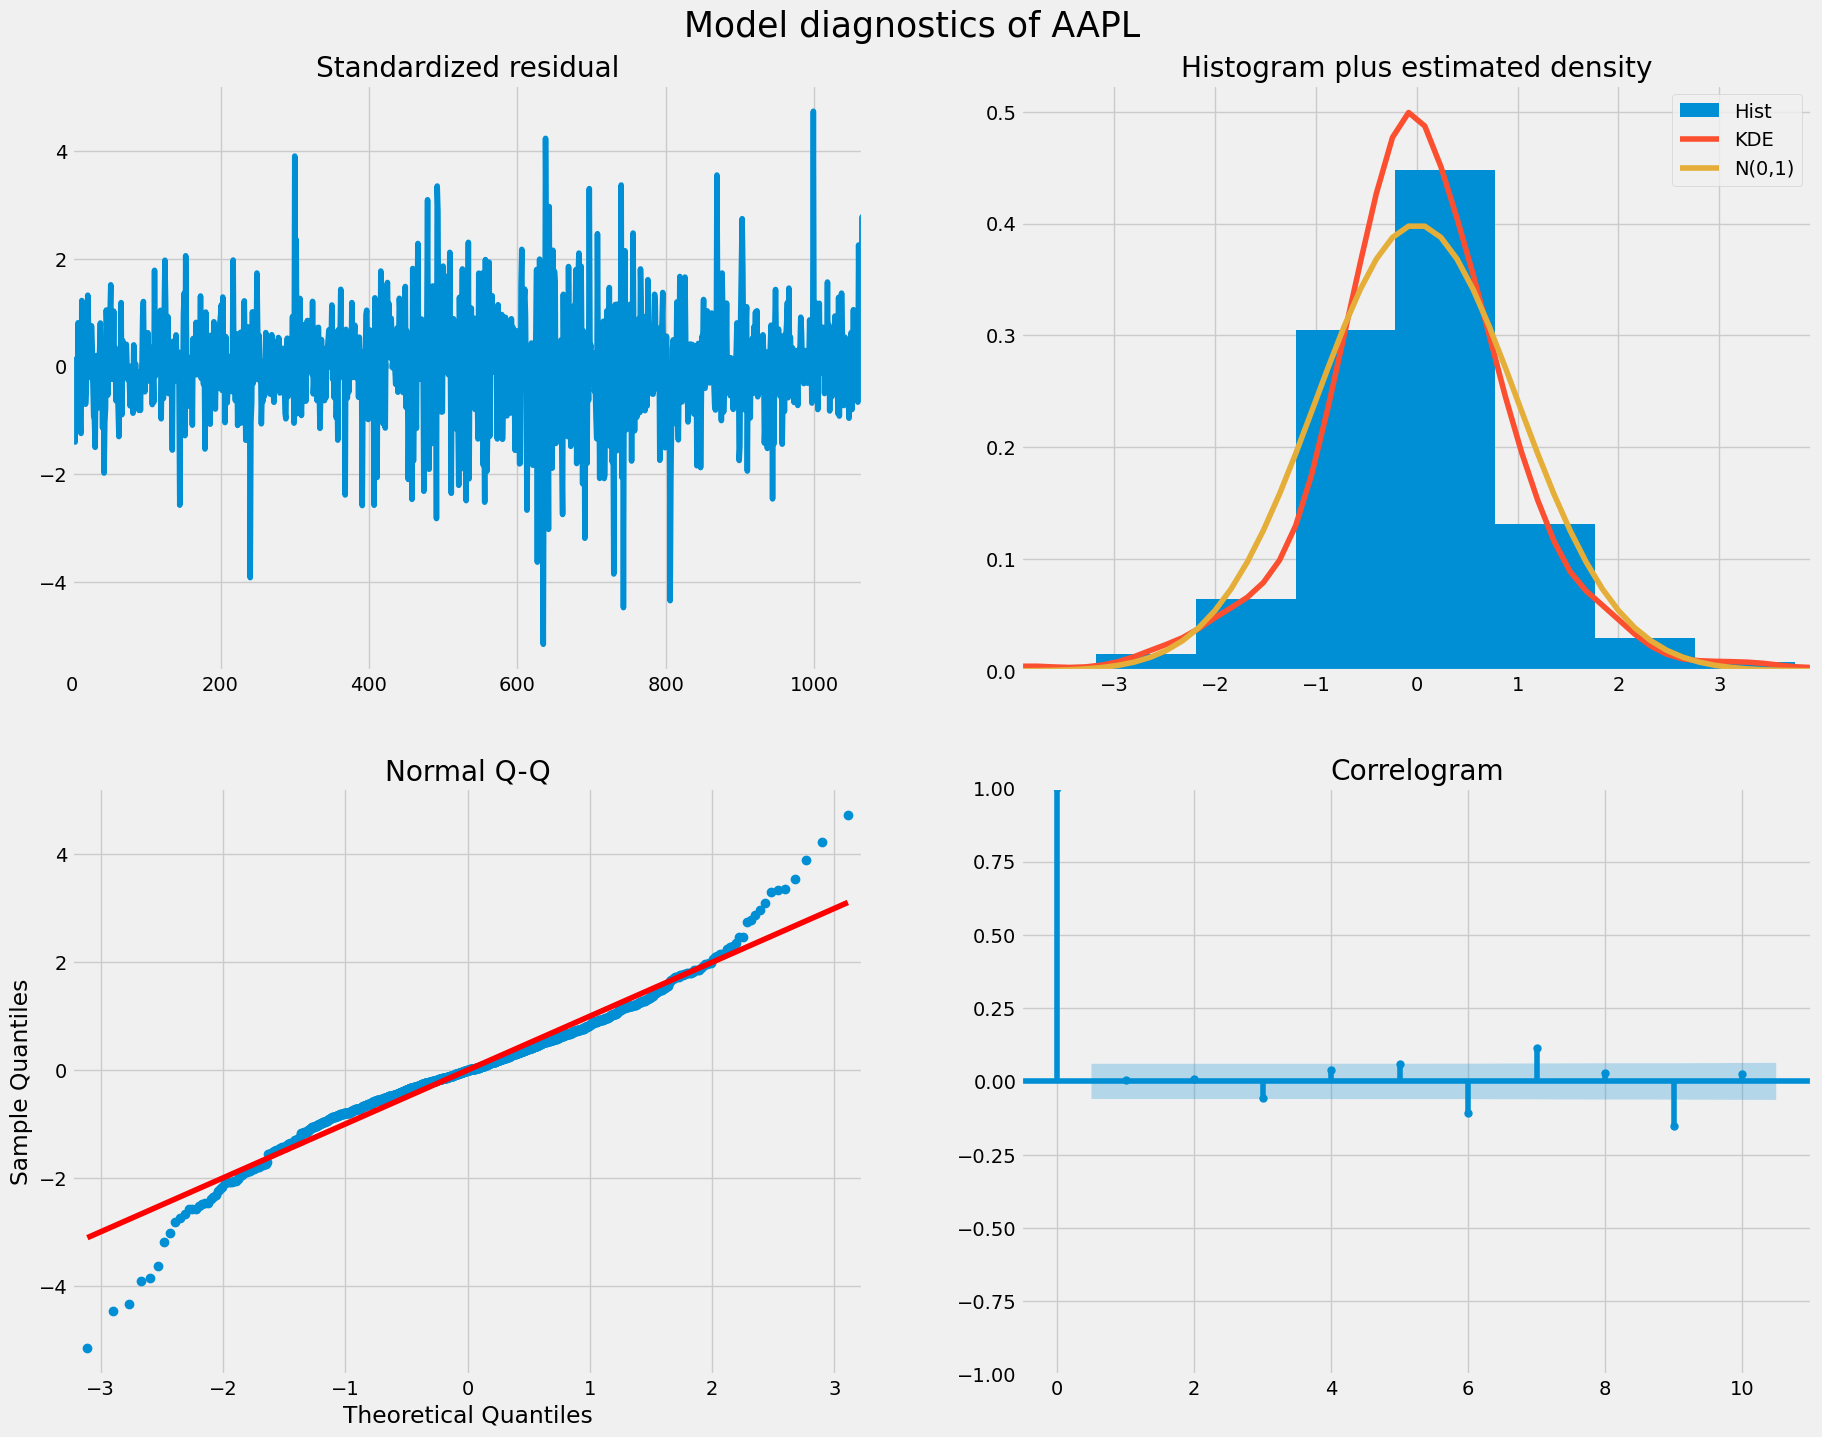

--------------------------------------------------------------------------------------------------------------------------------------------


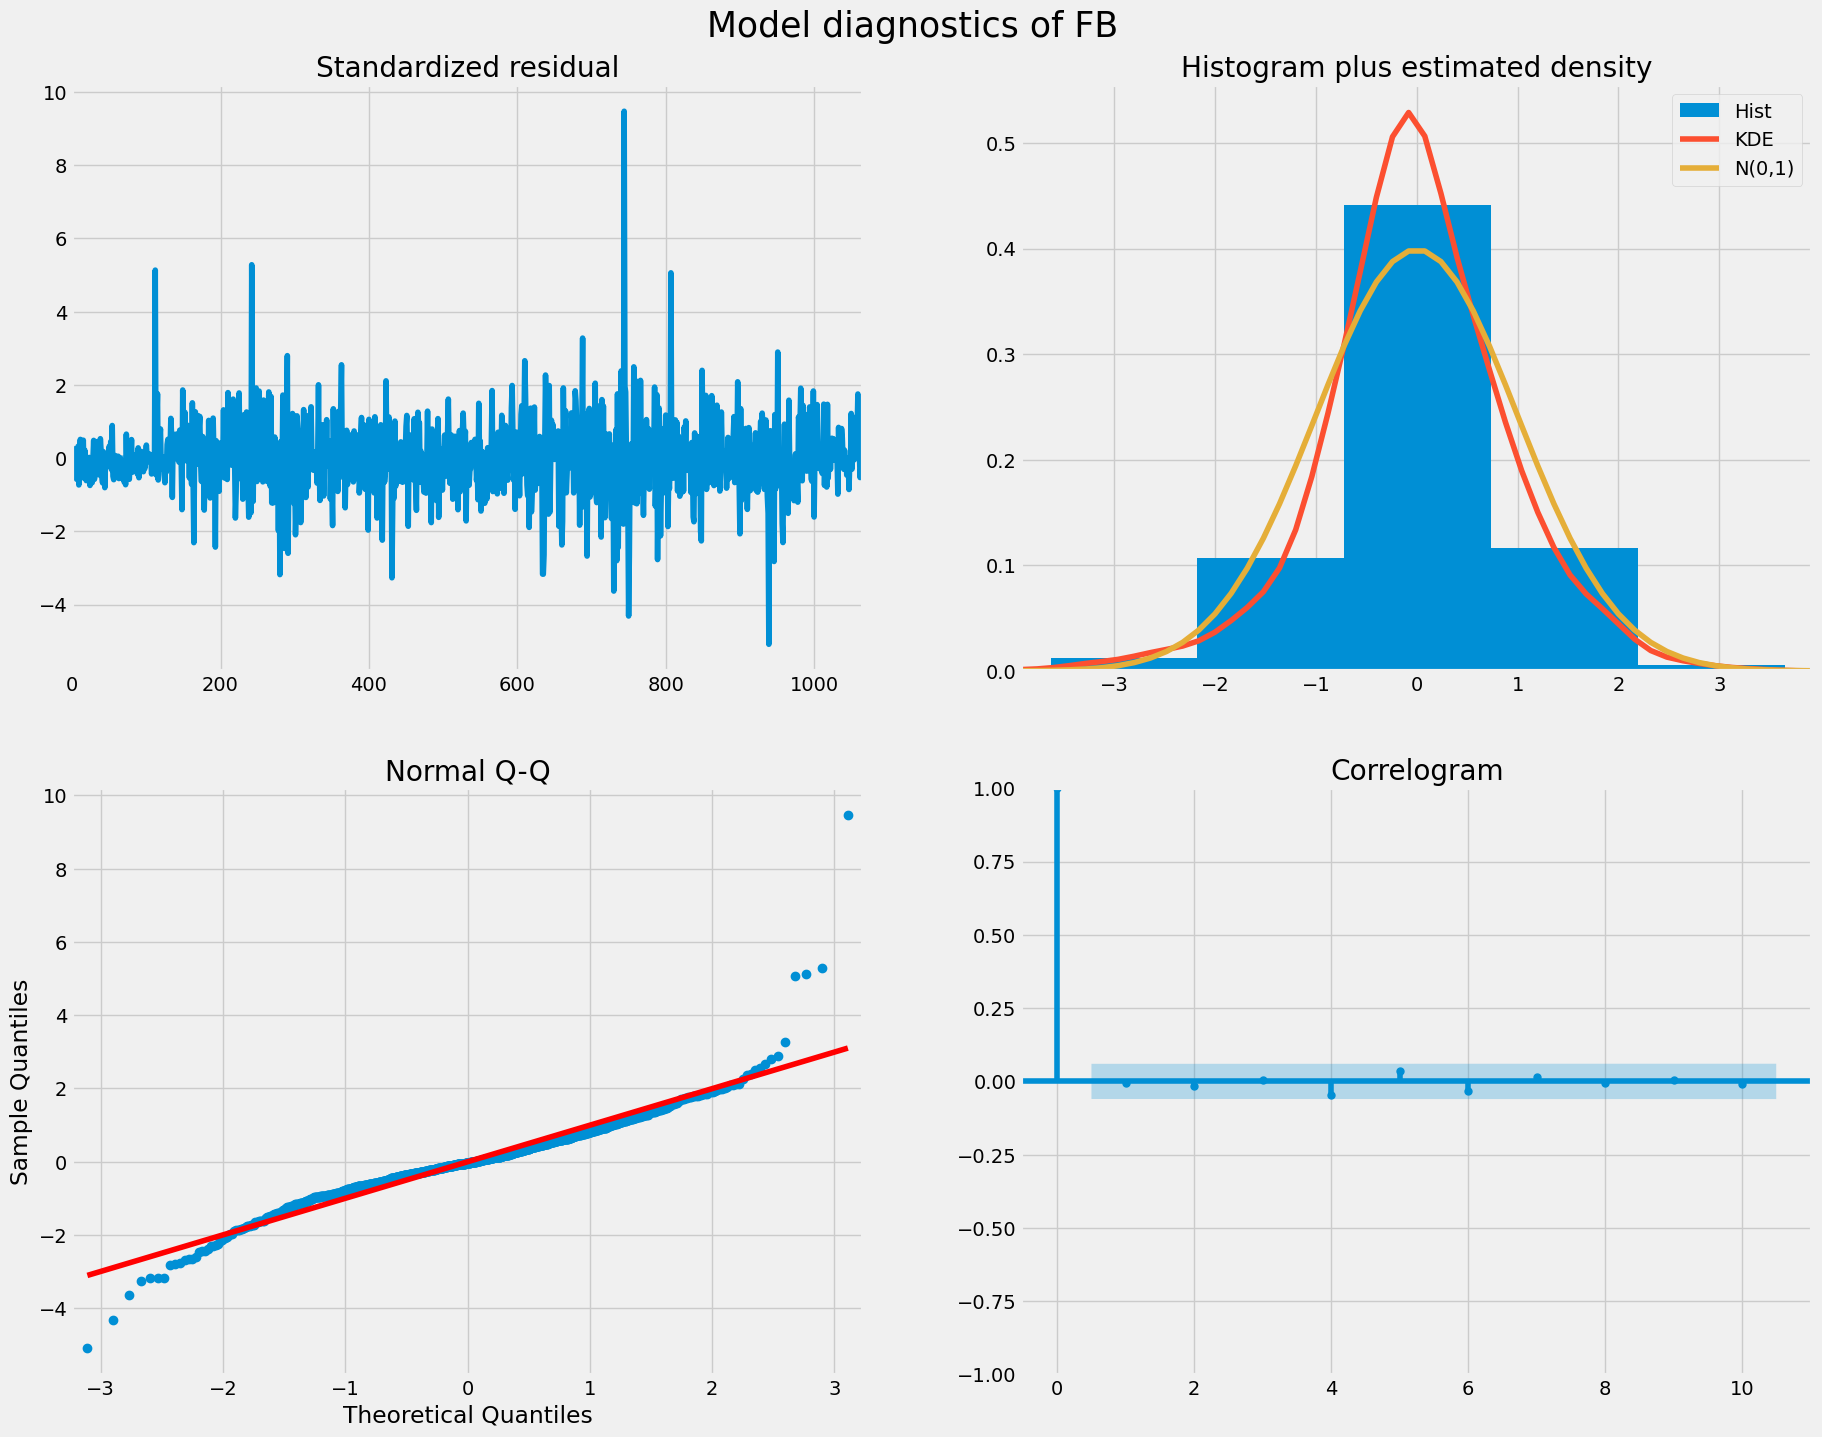

In [ ]:
def display_model_plots(model, co_name):
    plt.style.use('fivethirtyeight')
    model.plot_diagnostics(figsize = (20, 15));
    plt.suptitle(f'Model diagnostics of {co_name}', fontsize = 25)
    plt.subplots_adjust(top = 0.93)
    plt.show()
    plt.style.use('default')

display_model_plots(model_apl, 'AAPL')
print("-------"*20)
display_model_plots(model_fb, 'FB')

1) Standardized residual: It is an error term of price forecating and actual price of stocks

2) Histogram plus estimated density: Histogram reresents normal distribution of errors, KDE plots and N(0,1) is notation of indicate mean is ZERO and variance of the distribution is ONE.

3) Normal Q-Q: Normal Q-Q plot implies normality of distribution as sample quantities mostly inline with theoretical quanitites. any deviation in such alignment would indicate distribution is skewed, or in layman terms error is either positive or negative side.

4) Correlogram: It simply indicates partial auto-correlation of time-series and shows which laged time-series is significant in forecasting actual time-series.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def make_predictions_and_print_metrics(model, test_df, co_name):
    print(f"Forecasting and Metrics for {co_name}")

    try:
        # Make predictions and get confidence intervals
        forecast, confidence_interval = model.predict(
            X=test_df, n_periods=len(test_df), return_conf_int=True
        )
        forecasts = pd.Series(forecast, index=test_df[:len(test_df)].index)
        lower = pd.Series(confidence_interval[:, 0], index=test_df[:len(test_df)].index)
        upper = pd.Series(confidence_interval[:, 1], index=test_df[:len(test_df)].index)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(test_df.values, forecast.values))
        mae = mean_absolute_error(test_df.values, forecast.values)
        r2 = r2_score(test_df.values, forecast.values)

        # Print metrics
        print("RMSE:", rmse)
        print("MAE:", mae)
        print("R2 Score:", r2)

    except ValueError as e:
        if "Input contains NaN" in str(e):
            print("Error: Input contains NaN values. Imputing with 0.")
            test_df = test_df.fillna(0)
            # Try making predictions again after imputation
            return make_predictions_and_print_metrics(model, test_df, co_name)
        else:
            print(f"An unexpected error occurred: {e}")
            return None, None, None  # Return None for forecasts, lower, upper

    return forecasts, lower, upper
def make_predictions_and_print_metrics(model, test_df, co_name):
    print(f"Forecasting and Metrics for {co_name}")

    try:
        # 1. Handle potential NaN in test_df:
        test_df = test_df.dropna()  # Drop NaN values in test_df

        # 2. Make predictions with model.predict():
        forecast = model.predict(n_periods=len(test_df))

        # 3. Align predictions with test_df index:
        forecasts = pd.Series(forecast, index=test_df.index)

        # 4. If still NaN, handle with imputation:
        if forecasts.isnull().any():
            print("Warning: Predictions contain NaN. Imputing with previous values.")
            forecasts = forecasts.fillna(method='ffill')  # Forward fill NaN values
        forecast, confidence_interval = model.predict(
            X=test_df, n_periods=len(test_df), return_conf_int=True
        )
        forecasts = pd.Series(forecast, index=test_df[:len(test_df)].index)
        lower = pd.Series(confidence_interval[:, 0], index=test_df[:len(test_df)].index)
        upper = pd.Series(confidence_interval[:, 1], index=test_df[:len(test_df)].index)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(test_df.values, forecast.values))
        mae = mean_absolute_error(test_df.values, forecast.values)
        r2 = r2_score(test_df.values, forecast.values)

        # Print metrics
        print("RMSE:", rmse)
        print("MAE:", mae)
        print("R2 Score:", r2)


    except Exception as e:
        print(f"An unexpected error occurred during prediction: {e}")
        return None, None, None

    return forecasts, lower, upper

# Apply to both models
forecast, lower, upper = make_predictions_and_print_metrics(model_apl, apl_test, 'APPLE')
forecastf, lowerf, upperf = make_predictions_and_print_metrics(model_fb, fb_test, 'FB')

Forecasting and Metrics for APPLE
RMSE: 6.9383362970678375
MAE: 5.801532601060107
R2 Score: 0.5195016248932837
Forecasting and Metrics for FB
RMSE: 13.611243739594654
MAE: 11.971167668722757
R2 Score: -0.3224633330426079


not performing well on FB

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

def lstm_forecast(df, co_name):
    dataset = df[['y']].values  # Extract the 'y' column (closing price)
    dataset = dataset.astype('float32')

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Split into train and test sets
    train_size = int(len(dataset) * 0.85)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

    # Create the dataset with look_back
    look_back = 60  # Number of previous days to consider
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Create and fit the LSTM network
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), recurrent_dropout=0.2)) # Pass recurrent_dropout to LSTM constructor
    model.add(tf.keras.layers.LSTM(units=50, recurrent_dropout=0.2, kernel_regularizer=tf.keras.regularizers.l2(0.01)))  # Pass recurrent_dropout to LSTM constructor
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=0)  # Adjust epochs and batch_size as needed

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions to original scale
    train_predict = scaler.inverse_transform(train_predict)
    Y_train = scaler.inverse_transform([Y_train])
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform([Y_test])

    # Calculate root mean squared error
    train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
    test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
    train_mae = mean_absolute_error(Y_train[0], train_predict[:,0])
    test_mae = mean_absolute_error(Y_test[0], test_predict[:,0])
    train_r2 = r2_score(Y_train[0], train_predict[:,0])
    test_r2 = r2_score(Y_test[0], test_predict[:,0])
    std_dev = np.std(Y_test[0] - test_predict[:,0])

    # Calculate lower and upper bounds for confidence interval
    lower = test_predict[:,0] - 1.96 * std_dev
    upper = test_predict[:,0] + 1.96 * std_dev

    # Create forecast, lower, and upper Series with correct index
    forecast = pd.Series(test_predict[:,0], index=df.index[train_size+look_back+1:])
    lower = pd.Series(lower, index=df.index[train_size+look_back+1:])
    upper = pd.Series(upper, index=df.index[train_size+look_back+1:])
    print(f"Results for {co_name}:")
    print(f"Train RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
    print(f"Train MAE: {train_mae}")
    print(f"Test MAE: {test_mae}")
    print(f"Train R2: {train_r2}")
    return forecast,lower,upper
forecast1, lower1, upper1=lstm_forecast(aplph_df, 'APPLE')
forecastf1, lowerf1, upperf1=lstm_forecast(fbph_df, 'FB')

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Results for APPLE:
Train RMSE: 4.131745298625754
Test RMSE: 5.021177470808584
Train MAE: 3.2365995651678197
Test MAE: 4.105407269847107
Train R2: 0.9637534370337822
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Results for FB:
Train RMSE: 3.2383593199157787
Test RMSE: 8.110074797619548
Train MAE: 2.3721280910166618
Test MAE: 7.261977808973084
Train R2: 0.9893216304409579


In [ ]:
lowerf1.head()

219740    156.092804
219741    156.530121
219742    156.915985
219743    157.247635
219744    157.528900
dtype: float32